
## Simpler Linear, Non Linear, and GPTs


In [1]:

import pandas as pd
import numpy as np


In [2]:

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [3]:


import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

import numpy as np
import torch
import pandas as pd
import sklearn
import random



In [4]:

from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

## coefficient of determination 
from sklearn.metrics import r2_score



## Read the data


In [5]:

for_RNN_data_CIVS = pd.read_csv('input/RNN_time_DELAYS_2000_PerCast_rcalix.csv')


In [6]:

for_RNN_data_CIVS


,Unnamed: 0,SI_f1,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,COAL_FLOW_f3,Cast_Avg_Mn_f2,Slag_Fe_f2,...,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,cokerate_f4
0,1,0.719500,4.242439,2161.425209,9306.840913,184.818611,0.0,0.0,0.354,0.16,...,182.533770,148.126483,192.512412,37.369999,36.439999,9.86,98.334297,18.532928,36.602600,884.0
1,2,0.710486,4.174343,2168.238915,9336.364456,185.993447,0.0,0.0,0.313,0.83,...,183.725050,148.161842,192.366046,35.540001,35.970001,9.03,98.334297,18.397217,36.882963,884.0
2,3,0.666106,4.126144,2167.779119,9419.200115,185.828474,0.0,0.0,0.360,0.10,...,195.812061,147.562523,198.423474,34.849998,36.590000,9.13,98.334297,18.393974,36.568884,884.0
3,4,0.675145,4.120736,2166.974740,9564.165802,185.924481,0.0,0.0,0.319,0.34,...,188.028883,147.807509,179.116839,34.009998,35.900002,8.82,98.334297,18.370316,36.839147,884.0
4,5,0.776831,4.120331,2166.384674,9648.247637,185.942943,0.0,0.0,0.335,0.28,...,200.141261,149.014319,186.052137,34.380001,35.970001,8.73,98.334297,18.395860,36.658018,884.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,1379,0.762500,4.204430,2169.361647,9297.484543,185.046491,0.0,0.0,0.343,0.30,...,185.900341,148.103530,199.914193,35.900002,37.259998,10.04,98.334297,18.209401,36.727897,884.0
1379,1380,0.646000,4.208539,2169.079601,9312.779010,185.053796,0.0,0.0,0.324,0.30,...,182.408576,148.106012,193.501805,35.900002,37.259998,10.04,98.334297,18.762846,36.949964,884.0
1380,1381,0.654667,4.212648,2168.797556,9303.753420,185.007919,0.0,0.0,0.325,0.16,...,181.684649,148.108493,194.328694,35.580002,36.500000,9.30,98.334297,18.510120,36.877184,884.0
1381,1382,0.591667,4.217784,2168.444999,9333.448101,184.942435,0.0,0.0,0.335,0.26,...,195.202191,148.111595,215.606202,35.130001,37.470001,10.01,98.334297,18.168884,36.681149,884.0


In [7]:

cols_list_DF = for_RNN_data_CIVS.columns.values.tolist()
cols_list_DF


['Unnamed: 0',
 'SI_f1',
 'HOST_BLAST_MOISTURE_f3',
 'HOT_BLAST_TMP_NS_f3',
 'NAT_GAS _INJECTION_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'Slag_SiO2_f2',
 'Slag_CaO_f2',
 'Slag_MgO_f2',
 'SNORT_VALVE_POSITION_f3',
 'TOP_PRESS_f3',
 'HOT_BLAST_PRESSURE_f3',
 'cokerate_f4']

In [8]:

l_new = ['SI_f1',
 'HOST_BLAST_MOISTURE_f3',
 'HOT_BLAST_TMP_NS_f3',
 'NAT_GAS _INJECTION_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'Slag_SiO2_f2',
 'Slag_CaO_f2',
 'Slag_MgO_f2',
 'SNORT_VALVE_POSITION_f3',
 'TOP_PRESS_f3',
 'HOT_BLAST_PRESSURE_f3',
 'cokerate_f4']


In [9]:

for_RNN_data_CIVS = for_RNN_data_CIVS[l_new]


In [10]:

for_RNN_data_CIVS 


,SI_f1,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,COAL_FLOW_f3,Cast_Avg_Mn_f2,Slag_Fe_f2,Selec_Top_Gas_CO_f3,...,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,cokerate_f4
0,0.719500,4.242439,2161.425209,9306.840913,184.818611,0.0,0.0,0.354,0.16,21.080431,...,182.533770,148.126483,192.512412,37.369999,36.439999,9.86,98.334297,18.532928,36.602600,884.0
1,0.710486,4.174343,2168.238915,9336.364456,185.993447,0.0,0.0,0.313,0.83,20.996415,...,183.725050,148.161842,192.366046,35.540001,35.970001,9.03,98.334297,18.397217,36.882963,884.0
2,0.666106,4.126144,2167.779119,9419.200115,185.828474,0.0,0.0,0.360,0.10,20.749627,...,195.812061,147.562523,198.423474,34.849998,36.590000,9.13,98.334297,18.393974,36.568884,884.0
3,0.675145,4.120736,2166.974740,9564.165802,185.924481,0.0,0.0,0.319,0.34,20.609259,...,188.028883,147.807509,179.116839,34.009998,35.900002,8.82,98.334297,18.370316,36.839147,884.0
4,0.776831,4.120331,2166.384674,9648.247637,185.942943,0.0,0.0,0.335,0.28,20.617383,...,200.141261,149.014319,186.052137,34.380001,35.970001,8.73,98.334297,18.395860,36.658018,884.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,0.762500,4.204430,2169.361647,9297.484543,185.046491,0.0,0.0,0.343,0.30,21.039583,...,185.900341,148.103530,199.914193,35.900002,37.259998,10.04,98.334297,18.209401,36.727897,884.0
1379,0.646000,4.208539,2169.079601,9312.779010,185.053796,0.0,0.0,0.324,0.30,21.043999,...,182.408576,148.106012,193.501805,35.900002,37.259998,10.04,98.334297,18.762846,36.949964,884.0
1380,0.654667,4.212648,2168.797556,9303.753420,185.007919,0.0,0.0,0.325,0.16,21.048415,...,181.684649,148.108493,194.328694,35.580002,36.500000,9.30,98.334297,18.510120,36.877184,884.0
1381,0.591667,4.217784,2168.444999,9333.448101,184.942435,0.0,0.0,0.335,0.26,21.053935,...,195.202191,148.111595,215.606202,35.130001,37.470001,10.01,98.334297,18.168884,36.681149,884.0


In [11]:

for_RNN_data_CIVS.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1383 entries, 0 to 1382
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1383 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1383 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1383 non-null   float64
 3   NAT_GAS _INJECTION_f3    1383 non-null   float64
 4   WINDRATE_f3              1383 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1383 non-null   float64
 6   COAL_FLOW_f3             1383 non-null   float64
 7   Cast_Avg_Mn_f2           1383 non-null   float64
 8   Slag_Fe_f2               1383 non-null   float64
 9   Selec_Top_Gas_CO_f3      1383 non-null   float64
 10  Selec_Top_Gas_CO2_f3     1383 non-null   float64
 11  Selec_Top_Gas_H2_f3      1383 non-null   float64
 12  Selec_Top_Gas_N2_f3      1383 non-null   float64
 13  NE_Uptake_f3             1383 non-null   float64
 14  SE_Uptake_f3            


## Plots


In [12]:

plt.rcParams["figure.figsize"] = [15, 5]


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

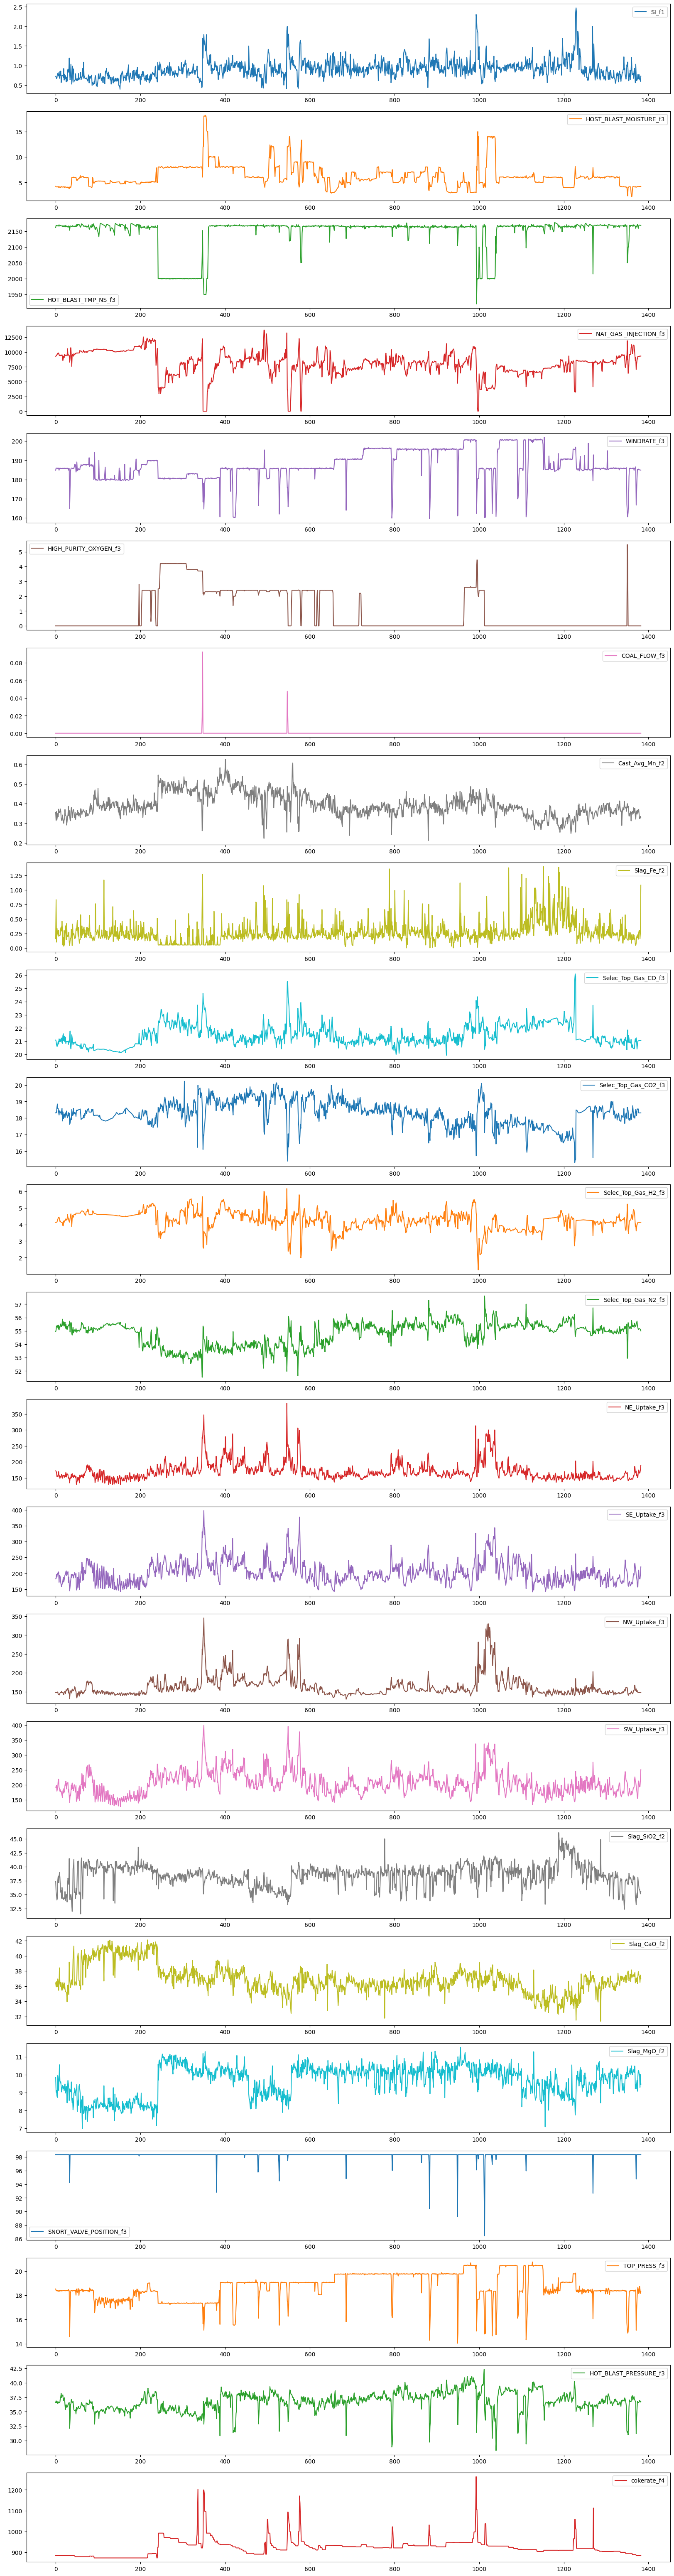

In [13]:

for_RNN_data_CIVS.plot( kind='line', subplots=True, figsize=(20,80),
        sharex=False, sharey=False, legend=True )


In [14]:

print(for_RNN_data_CIVS.shape)


(1383, 24)



## Parameters


In [15]:

pd.options.display.max_columns = None



## Process data


In [16]:

for_RNN_data_CIVS.shape[0]


1383

In [17]:

n  = int( for_RNN_data_CIVS.shape[0] * 0.8 )

n


1106

In [18]:

train_CIVS       = for_RNN_data_CIVS[   :n ] 
test_CIVS        = for_RNN_data_CIVS[ n:   ]


In [19]:

train_CIVS.shape


(1106, 24)

In [20]:

test_CIVS.shape


(277, 24)


## Standardize (Scaling)


In [21]:

def standardize_x_scales( data_gpt_pd ):


    data_gpt = torch.tensor(data_gpt_pd.values).float()
        
    epsilon = 0.0001

    print( data_gpt.shape)        
    
    x_means      = data_gpt .mean(0,  keepdim=True)
    x_deviations = data_gpt .std( 0,  keepdim=True) + epsilon

    ## x_train_tr_scaled = (x_train_tr - x_means) / x_deviations
    ## y_test_tr_scaled  = (y_test_tr  - y_means) / y_deviations
    
    return data_gpt, x_means, x_deviations


In [22]:

## x_means      = simple_x_train.mean(0, keepdim=True ) 
## x_deviations = simple_x_train.std( 0, keepdim=True) + epsilon



## A GPT for Time Series


In [23]:

torch.manual_seed(256)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

block_size        = 20     ## 4          ## 40      ## N tokens in sequence
batch_size        = 8 
max_iters         = 3000
eval_interval     = 500     
learning_rate     = 0.0003
eval_iters        = 300
vocab_size        = 88  ## 65

## every id for a given token is embedded to vector of this size

n_embd            = 512   ## 24        ## 512       ## 24 for time series, silicon is 0           
n_head            = 8         ## 8 attention heads
n_layer           = 6         ## 6 eoncoder layers
dropout           = 0.2



## remove


In [24]:


data_gpt = train_CIVS

ix = torch.randint(   len(data_gpt) - block_size, (batch_size,)   )
    
print(ix.shape)
print(ix)
print( len(data_gpt) - block_size )
print(  block_size )
print(  (batch_size,)  )
    


torch.Size([8])
tensor([  56,  144,  621,  429,  190, 1033,  853,  538])
1086
20
(8,)


In [25]:

for i in ix:
    print(   i.item() )


56
144
621
429
190
1033
853
538


In [26]:

data_gpt.shape


(1106, 24)

In [27]:

ix[0]


tensor(56)

In [28]:

data_gpt[  672:672+block_size ]


,SI_f1,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,COAL_FLOW_f3,Cast_Avg_Mn_f2,Slag_Fe_f2,Selec_Top_Gas_CO_f3,Selec_Top_Gas_CO2_f3,Selec_Top_Gas_H2_f3,Selec_Top_Gas_N2_f3,NE_Uptake_f3,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,cokerate_f4
672,1.015153,5.084400,2165.537936,6316.164783,190.612482,0.0,0.0,0.317,0.23,20.909377,19.187079,3.310155,55.402622,144.798894,159.565047,144.561634,158.806992,39.810001,35.930000,10.32,98.334297,19.766005,37.348289,932.000000
673,1.337295,4.975778,2165.102477,6148.964632,190.673184,0.0,0.0,0.356,0.32,20.862125,19.333235,3.292798,55.351086,152.360266,172.452192,141.618635,174.861647,39.470001,36.919998,10.63,98.334297,19.774731,37.799209,932.000000
674,0.858646,4.773651,2164.249846,6151.058600,190.751609,0.0,0.0,0.359,0.39,20.928918,19.054291,3.199001,55.749780,159.824051,177.763734,143.056331,189.441469,39.099998,35.849998,10.21,98.334297,19.770819,37.553812,932.000000
675,0.757000,4.540012,2168.037412,6059.098444,190.429183,0.0,0.0,0.318,0.31,21.276434,18.746819,3.159473,55.505771,150.057496,177.160519,142.827949,181.353583,39.139999,36.119999,10.11,98.334297,19.767912,37.420300,932.000000
676,0.755219,4.551995,2165.553026,5678.316233,190.409958,0.0,0.0,0.299,0.45,20.815051,19.227409,3.134546,55.589975,147.225250,172.328285,142.190860,174.098718,39.090000,35.220001,9.90,98.334297,19.762895,37.870692,932.000000
677,1.199200,5.974056,2165.434828,5855.659054,190.826612,0.0,0.0,0.282,0.21,20.982427,19.758428,3.239936,55.019809,151.951630,168.617086,141.443657,171.739483,39.310001,36.160000,10.28,98.334297,19.755931,36.413651,930.661972
678,1.232857,4.534073,2165.557204,7224.069449,190.473810,0.0,0.0,0.357,0.27,20.813251,18.854275,3.583292,55.567863,158.802458,186.439335,140.786915,199.912881,38.410000,36.150002,10.12,98.334297,19.759545,36.669016,927.000000
679,0.873568,4.696176,2165.967312,5832.727752,190.605051,0.0,0.0,0.385,0.48,20.995769,19.383972,3.105097,55.475842,153.847160,183.131154,140.437913,191.440458,39.540001,35.459999,10.01,98.334297,19.774847,37.065608,927.000000
680,0.725475,5.511603,2164.999640,6684.038144,190.404090,0.0,0.0,0.343,0.29,21.351173,18.918010,3.493865,55.194023,153.357690,178.387753,140.416675,183.839917,39.320000,35.970001,10.27,98.334297,19.743510,36.140182,927.000000
681,1.116787,5.334570,2165.004351,8703.982394,190.703959,0.0,0.0,0.352,0.28,20.793924,18.827648,4.203324,55.192029,154.175652,174.172306,140.889536,178.459543,39.230000,35.669998,10.10,98.334297,19.757093,36.305124,927.000000



## Shift and create batches


In [29]:

def get_batch( data_gpt ):
    
    ix = torch.randint(   len(data_gpt) - block_size, (batch_size,)   )

    ## ix = [ int( tensor1.item() ) for tensor1 in ix ]
    ## print(ix.shape)
    ## print(ix)
    ## print(ix[1])
    ## print(  type(ix[1])  )
    ## print( len(data_gpt) - block_size )
    ## print(  block_size )
    ## print(  (batch_size,)  )
    
    x  = torch.stack(    [  data_gpt[   i   : i+block_size    ]   for i in ix ]    ) 
    y  = torch.stack(    [  data_gpt[   i+1 : i+1+block_size  ]   for i in ix ]    )
    
    x, y = x.to(device), y.to(device)

    return x, y


In [30]:

train_CIVS.shape


(1106, 24)

In [31]:

test_CIVS.shape


(277, 24)

In [32]:

train_CIVS_tr, x_means, x_standard_devs = standardize_x_scales( train_CIVS )

train_CIVS_tr_scaled = ( train_CIVS_tr - x_means ) / x_standard_devs

bt_train_x, bt_train_y = get_batch( train_CIVS_tr_scaled )


torch.Size([1106, 24])


In [33]:

bt_train_x.shape


torch.Size([8, 20, 24])

In [34]:

bt_train_y.shape


torch.Size([8, 20, 24])

In [35]:

x_means


tensor([[8.9635e-01, 6.4921e+00, 2.1409e+03, 8.0839e+03, 1.8729e+02, 1.1880e+00,
         1.6524e-04, 4.0660e-01, 2.4267e-01, 2.1393e+01, 1.8419e+01, 4.2822e+00,
         5.4671e+01, 1.7482e+02, 2.0632e+02, 1.6707e+02, 2.1094e+02, 3.8350e+01,
         3.7267e+01, 9.7154e+00, 9.8271e+01, 1.8716e+01, 3.6757e+01, 9.2620e+02]])


## Estimate loss - No Training


In [36]:

@torch.no_grad()    ## for efficient processing
def estimate_loss( model, criterion ):
    
    out = {}
    model.eval()   ## set to no training
    
    for split in ['train', 'test']:
        losses = torch.zeros(eval_iters)
        for k in range( eval_iters ):
            X, Y = get_batch( split )
            logits  = model(X, Y)
            B, T, E  = logits.shape
            pred     = logits.view( B*T, E)
            y_train  = Y.view(B*T, E)
            loss =  criterion( pred, y_train )
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()  ## back to training

    return out



## NN Architectures


In [37]:

class Head(nn.Module):

    def __init__(self, head_size):
        super().__init__()
        
        self.key   = nn.Linear(n_embd, head_size, bias=False)  ## [512, 64]
        self.query = nn.Linear(n_embd, head_size, bias=False)  ## [512, 64]
        self.value = nn.Linear(n_embd, head_size, bias=False)  ## [512, 64]

        tril_def = torch.tril( torch.ones(block_size, block_size) )  ## [40, 40]
        
        self.register_buffer(
                  'tril', 
                  tril_def
               )
        
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        
        B, T, E = x.shape   ## [batch_size, 40, 512]
        
        k = self.key(   x )            ## k = (B, T, 64)
        q = self.query( x )            ## q = (B, T, 64)

        E2 = 64     ## I think this is 64 and not 512
        ## (B, T, E) @ (B, E, T)  -> (B, T, T)
        wei = q @ k.transpose(-2, -1) * E2 ** -0.5        
        
        wei = wei.masked_fill(
                      self.tril[:T, :T] == 0, 
                      float('-inf')
        )   
        
        ## (B, T, T)
        wei = F.softmax( wei, dim= -1 )         ## (B, T, T)
        wei = self.dropout(   wei   )
        
        ## perform weighted aggregation of values
        
        v   = self.value(  x  )   ## x = (B, 40, E)
        out = wei @ v             ## (B, T, T) @ (B, T, 64) -> (B, T, 64)
        
        return out
        


In [38]:

class FeedForward(nn.Module):

    def __init__(self, n_embd):         ## 512
        
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),      ## [512, 4*512]
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),      ## [4*512, 512]
            nn.Dropout(dropout),
        )
        
    def forward(self, x):
        return self.net(x)


In [39]:

class MultiHeadAttention(nn.Module):

    def __init__(self, num_heads, head_size):    ## (8, 64)
        super().__init__()
        self.heads = nn.ModuleList(  [ Head(head_size) for _ in range(num_heads) ] )
        self.proj  = nn.Linear(n_embd, n_embd)   ## 512, 512
        self.dropout = nn.Dropout(dropout)
    
    def forward(self, x):
        out = torch.cat(   [ h(x) for h in self.heads ], dim = -1   )
        out = self.proj(  out   )
        out = self.dropout(   out   )
        return out


In [40]:

class Block(nn.Module):
    
    def __init__(self, n_embd, n_head):     ## (512, 8)
        super().__init__()
        head_size = n_embd // n_head        ## 64
        self.sa   = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedForward( n_embd)    ## 512
        self.ln1  = nn.LayerNorm(n_embd)
        self.ln2  = nn.LayerNorm(n_embd)
        
    def forward(self, x):
        x = x + self.sa(     self.ln1(x)      )
        x = x + self.ffwd(   self.ln2(x)      )
        return x


In [41]:

class Time_Series_GPT(nn.Module):
    
    def __init__(self, seq_length, input_size, output_size):
        
        super().__init__()
        
        self.output_size= output_size
        self.seq_length = seq_length
        self.input_size = input_size

        
        ## self.token_embedding_table = nn.Embedding(vocab_size, n_embd)   ## [65, 512]
        self.pos_emb_table         = nn.Embedding(block_size, n_embd)     ## [block, 512]
        
        self.blocks = nn.Sequential(
                *[   Block(n_embd, n_head=n_head) for _ in range(n_layer)    ]
        )
        
        self.ln_f        = nn.LayerNorm(  n_embd    )        
        self.lm_ffw_head = nn.Linear(n_embd, 24)  ## [512, 65] # FFW Layer

        self.map_24_512 = nn.Linear(24, 512)  ## [24, 512] # rc remove
        

    def forward(self,  idx, targets):

        ## print( idx.shape      )
        ## print( targets.shape  )

        B = idx.shape[0]       ## 8
        T = idx.shape[1]       ## 20
        
        ## B, T = idx.shape     ## (Batch, 40)
        ## ids and targets are both (B, T) tensors of integers
        ## tok_emb = self.token_embedding_table(idx)  

        idx = self.map_24_512( idx )

        tok_emb = idx       ## (8, 20, 24)
        pos_emb = self.pos_emb_table( torch.arange(T, device=device) )  

        ## print("blue")
        ## print(tok_emb.shape)
        ## print(pos_emb.shape)
        
        x = tok_emb + pos_emb    ## [B, T, E] or [64, 40, 512], now [8, 20, 24]

        ## self.map_24_512 = nn.Linear(24, 512)  ## [24, 512] # rc remove
        
        x = self.blocks(  x  )   ## (B, T, E)   
        x = self.ln_f(    x  )   ## (B, T, E)   ## norm
        logits = self.lm_ffw_head(x)         ## [B, 40, 65] 
        
        return logits
        
        
    def generate(self, idx, max_new_tokens):    ## idx is (B, T)
        for _ in range(max_new_tokens):
            ## crop idx to the last block_size tokens
            idx_cond = idx[:, -block_size:, :]
            print(idx_cond.shape)
            logits = self(idx_cond, 0 )    ## ## get preds
            logits = logits[:, -1, :]    ## focus on last one (B, E)
            logits = logits.unsqueeze(0)
            print(logits.shape)
            ## probs = F.softmax(logits, dim= -1)    ## (B, E) get probs
            ## idx_next = torch.multinomial(probs, num_samples=1)     ## (B, 1) selected
            idx = torch.cat(  (idx, logits), dim=1  )   ## (B, T+1) append sample to running sequence
            print(idx.shape)
        return idx
            


In [42]:

def train_model_GPT(model_type='GPT'):
 
    
    model  = Time_Series_GPT(block_size, 24, 24)
    model  = model.to( device )
    
    optimizer       = torch.optim.Adam(     model.parameters(), lr=learning_rate   )
    ## optimizer    = torch.optim.RMSprop(  model.parameters(), lr=learning_rate   )

    criterion       = nn.MSELoss()
    
    history = {'loss': [], 'test_loss': []}

    train_CIVS_tr, x_means, x_standard_devs = standardize_x_scales( train_CIVS )

    train_CIVS_tr_scaled = ( train_CIVS_tr - x_means ) / x_standard_devs
        
    model.train()
    
    for batch_i, epoch in enumerate( range(max_iters) ):

        ## xb, yb = get_batch('train')
        xb, yb    = get_batch( train_CIVS_tr_scaled )

        logits   = model( xb, yb )

        B, T, E  = logits.shape
        
        pred           = logits.view( B*T, E)
        y_train        = yb.view(B*T, E)
        
        loss =  criterion( pred, y_train ) 
        
        optimizer.zero_grad(set_to_none=True)           ## zero out
        loss.backward()
        optimizer.step()

        history['loss'].append(  loss.item()  )

        if batch_i % 500 == 0:
            print(batch_i, "train loss = ", loss.item() )

    
    return model, history, x_means, x_standard_devs


In [43]:

si_GPT, history_GPT, x_means, x_standard_devs = train_model_GPT('GPT')


torch.Size([1106, 24])
0 train loss =  0.9210785031318665
500 train loss =  0.16664494574069977
1000 train loss =  0.11962532997131348
1500 train loss =  0.08024146407842636
2000 train loss =  0.04491625353693962
2500 train loss =  0.031116975471377373



## Plot train losses


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


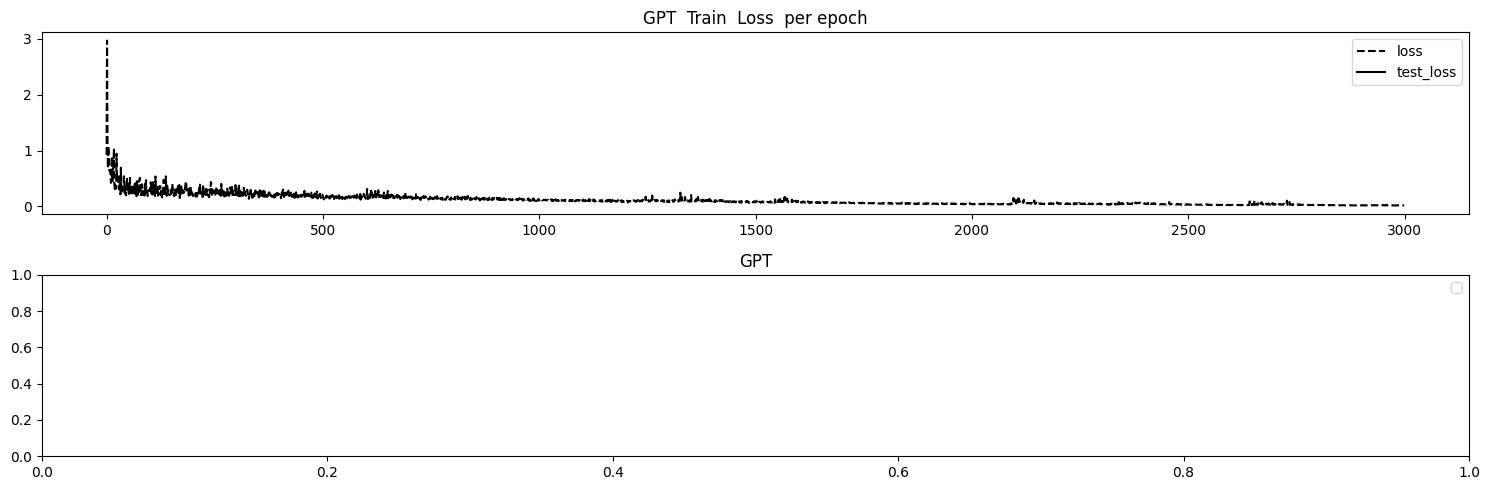

In [44]:


fig, ax = plt.subplots(2, 1) 
ax[0].set_title(f'GPT  Train  Loss  per epoch')
ax[0].plot(history_GPT['loss'],     'k--',   label='loss'      )
ax[0].plot(history_GPT['test_loss'], 'k',    label='test_loss'  )
ax[0].legend()
ax[1].set_title(f"GPT")

fig.tight_layout()
ax[1].legend(); plt.show()



## Generate with GPT

* Input of 5


In [50]:

test_CIVS.shape


(277, 24)

In [51]:

def GPT_get_batch_test( test_data ):
    
    ## x_time_series = torch.tensor(test_data.values).float()

    x_time_series = test_data

    print( x_time_series.shape )

    x  = torch.stack(   [   x_time_series[ 0 : -1    ]    ]    ) 
    y  = torch.stack(   [   x_time_series[ 1 :       ]    ]   )
    
    x, y = x.to(device), y.to(device)

    return x, y


In [52]:

def GPT_generate_inference(model, x_test, which_feature, string_feature):

    xb_test, yb_test = GPT_get_batch_test( x_test )
    
    print(xb_test.shape)
    print(yb_test.shape)

    input_test_x = xb_test[ :,  : 5 ]
    print("input to m.generate")
    print(input_test_x.shape)


    pred_20_seq = model.generate( input_test_x, 14 )

    print("shape of model generated output: ")
    print(pred_20_seq.shape)

    
    y_pred_gpt     = pred_20_seq.detach().numpy() 
    y_real_gpt     =     yb_test.detach().numpy() 
    
    print(y_pred_gpt.shape)
    print(y_real_gpt.shape)

    
    y_real_gpt = y_real_gpt.squeeze(0)
    y_pred_gpt = y_pred_gpt.squeeze(0)

    print( "unscaling" )

    print(y_pred_gpt.shape)
    print(y_real_gpt.shape)

    l_real = y_real_gpt[ :, 0]
    l_pred = y_pred_gpt[ :, 0]

    si_mean         = x_means[0, 0].numpy()
    si_standard_dev = x_standard_devs[0, 0].numpy()

    print("these: ")
    print( x_means.shape )
    print( l_pred.shape )
    print( si_standard_dev.shape )
    print( si_mean.shape )
    print( si_standard_dev )
    print( si_mean)
    print( l_pred )
    

    ## y_descaled = y_scaled * self.y_deviations + self.y_means
    l_pred        = l_pred   * si_standard_dev   + si_mean
    l_real        = l_real   * si_standard_dev   + si_mean

    print( l_pred )
    
    print("unscale si end")


    eval_criterion = nn.MSELoss()

    mse_eval_bins = eval_criterion(
                          torch.FloatTensor( l_pred ), 
                          torch.FloatTensor( l_real )
    )

    print( l_pred  )
    print( l_real )

    print( l_pred.shape  )
    print( l_real.shape  )

    
    print( string_feature )
    print(f'Test MSE Loss: {mse_eval_bins.item():.4f}')

    x = [ i for i in range(len(l_real)) ] 
    print(len(x))
   

    plt.scatter(x, l_real, label = "real", color='red') 
    plt.plot(   x, l_real, label = "real", color='red') 
 
    print( l_pred[1:].shape )
    print( l_pred[0].shape )
    ## l_pred  = np.concatenate( ( l_pred[1:], l_pred[0] ) )
    l_pred = np.roll(l_pred, -1)
    
    plt.scatter(x, l_pred, label = "pred", color='blue') 
    plt.plot(   x, l_pred, label = "pred", color='blue') 
    
    plt.legend() 
    plt.show()


In [53]:

bin_size = 20


torch.Size([277, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 16, 24])
torch.Size([1, 1, 24])
torch.Size([1, 17, 24])
to

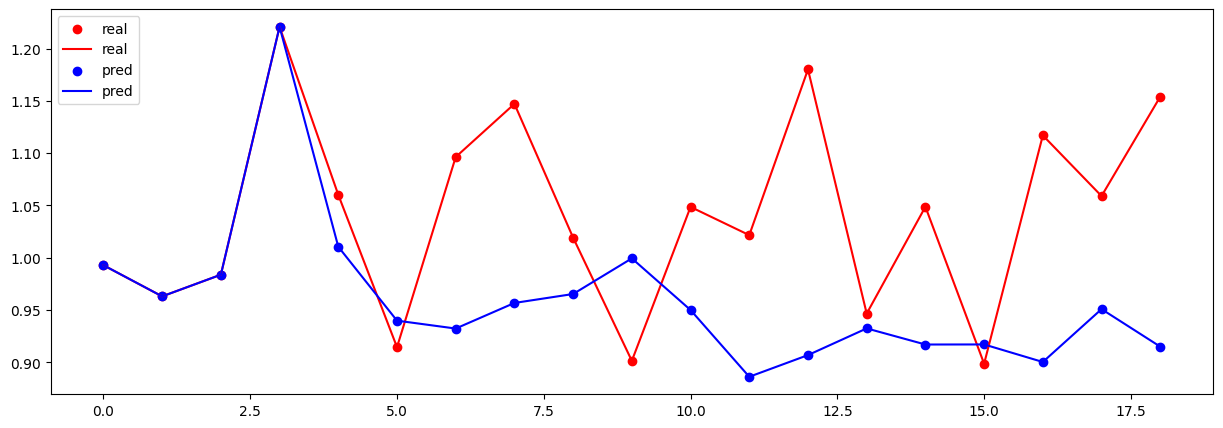

torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 16, 24])
torch.Size([1, 1, 24])
torch.Size([1, 17, 24])
torch.Size([1, 17, 24])


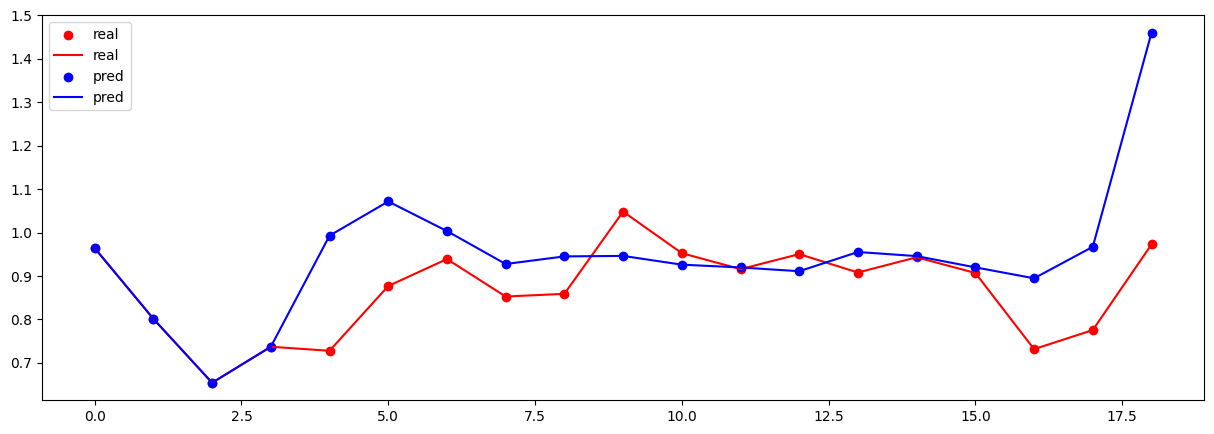

torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 16, 24])
torch.Size([1, 1, 24])
torch.Size([1, 17, 24])
torch.Size([1, 17, 24])


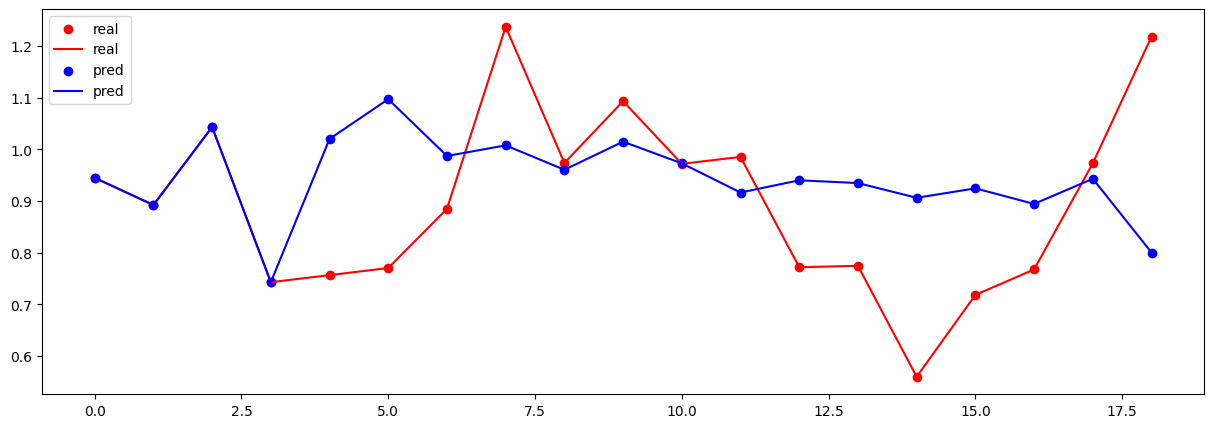

torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 16, 24])
torch.Size([1, 1, 24])
torch.Size([1, 17, 24])
torch.Size([1, 17, 24])


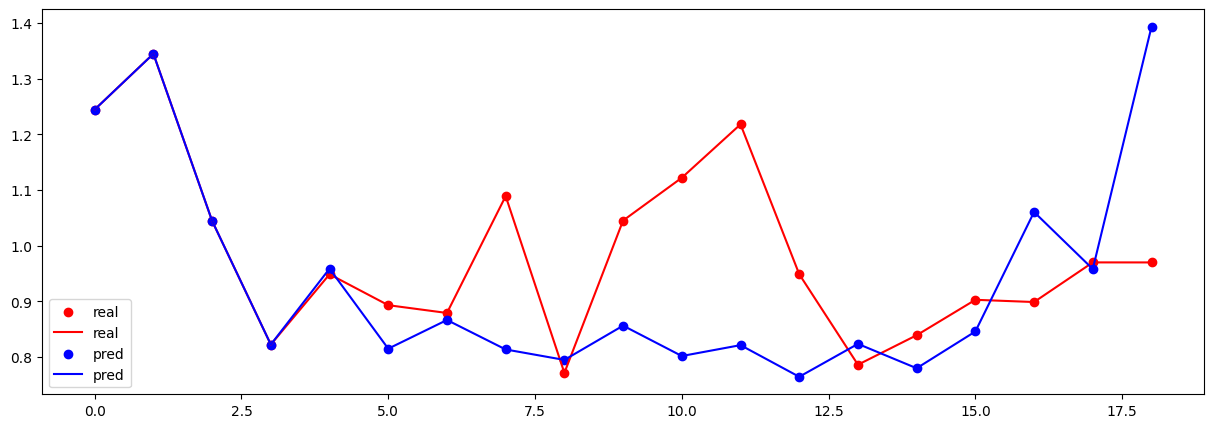

torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 16, 24])
torch.Size([1, 1, 24])
torch.Size([1, 17, 24])
torch.Size([1, 17, 24])


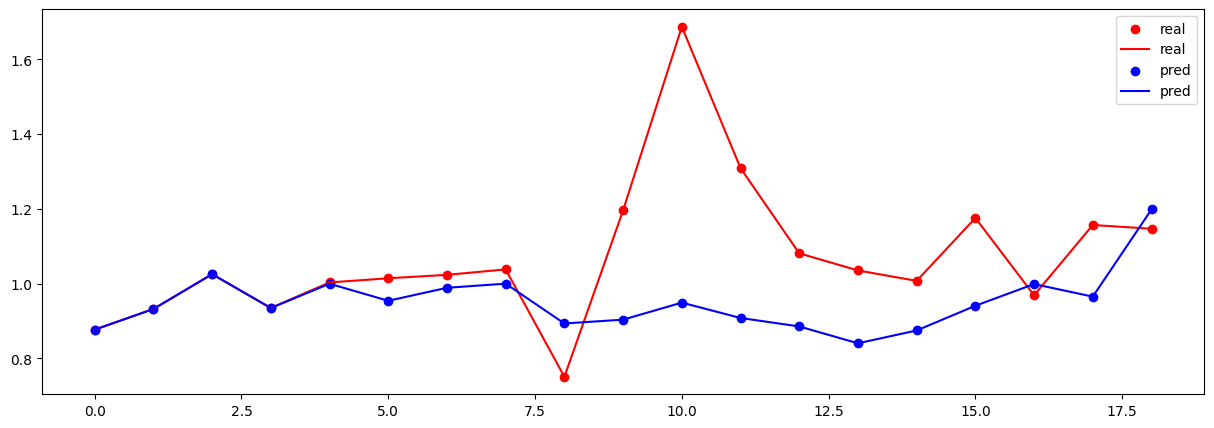

torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 16, 24])
torch.Size([1, 1, 24])
torch.Size([1, 17, 24])
torch.Size([1, 17, 24])


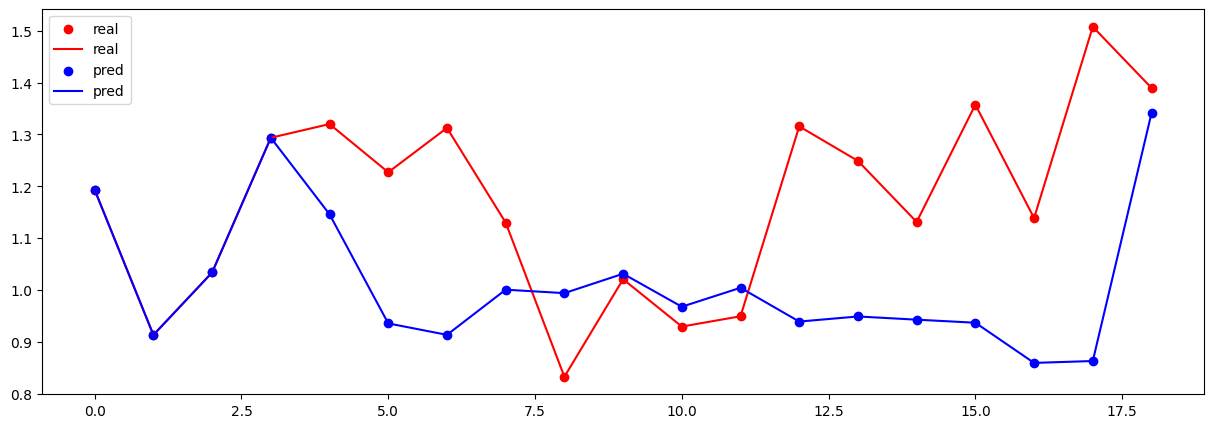

torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 16, 24])
torch.Size([1, 1, 24])
torch.Size([1, 17, 24])
torch.Size([1, 17, 24])


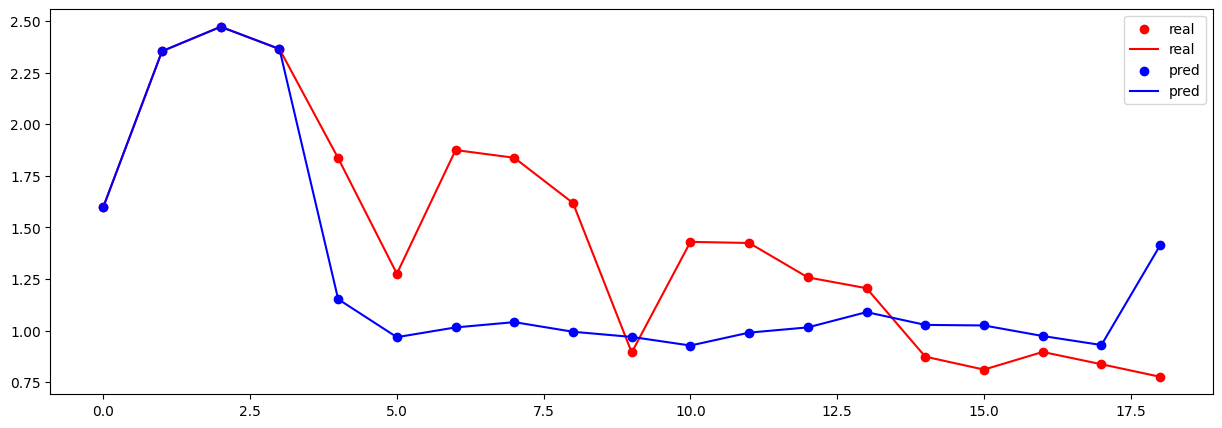

torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 16, 24])
torch.Size([1, 1, 24])
torch.Size([1, 17, 24])
torch.Size([1, 17, 24])


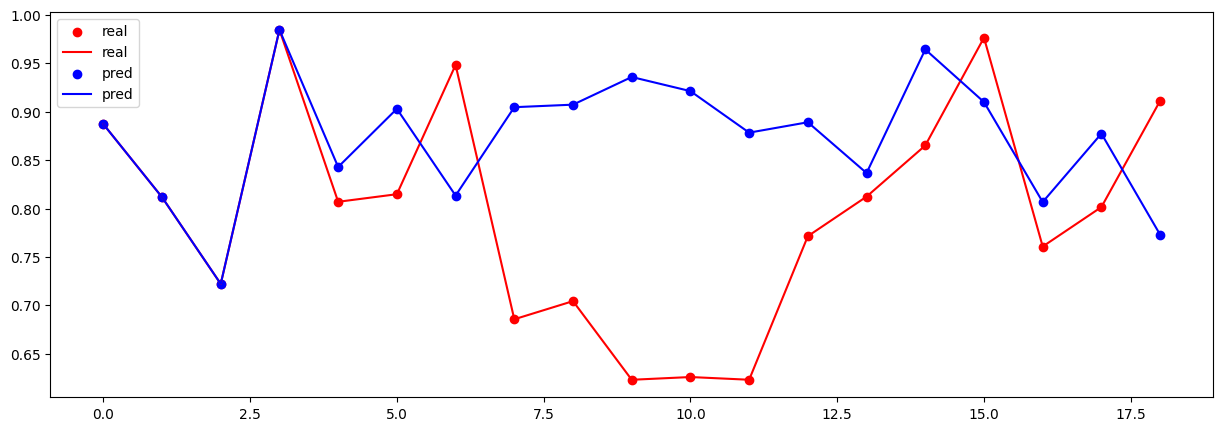

torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 16, 24])
torch.Size([1, 1, 24])
torch.Size([1, 17, 24])
torch.Size([1, 17, 24])


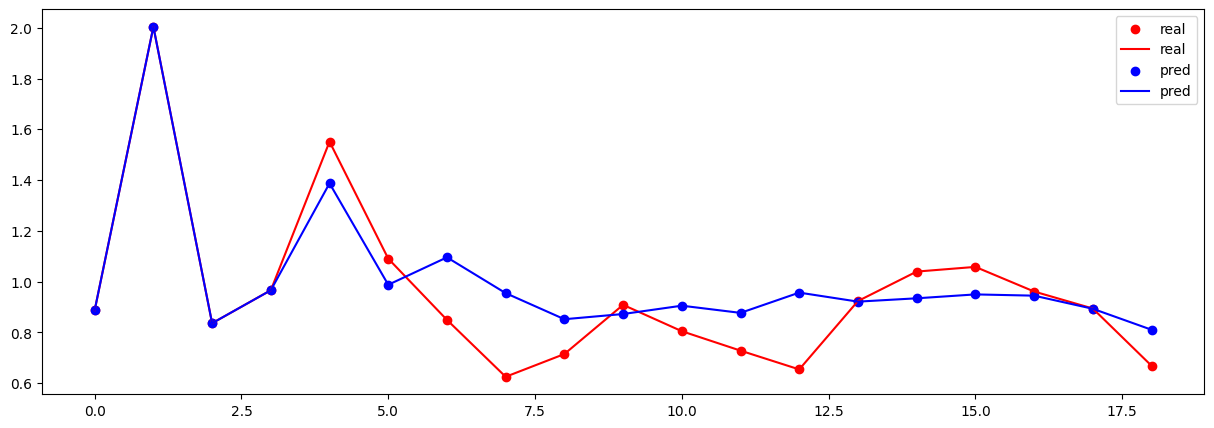

torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 16, 24])
torch.Size([1, 1, 24])
torch.Size([1, 17, 24])
torch.Size([1, 17, 24])


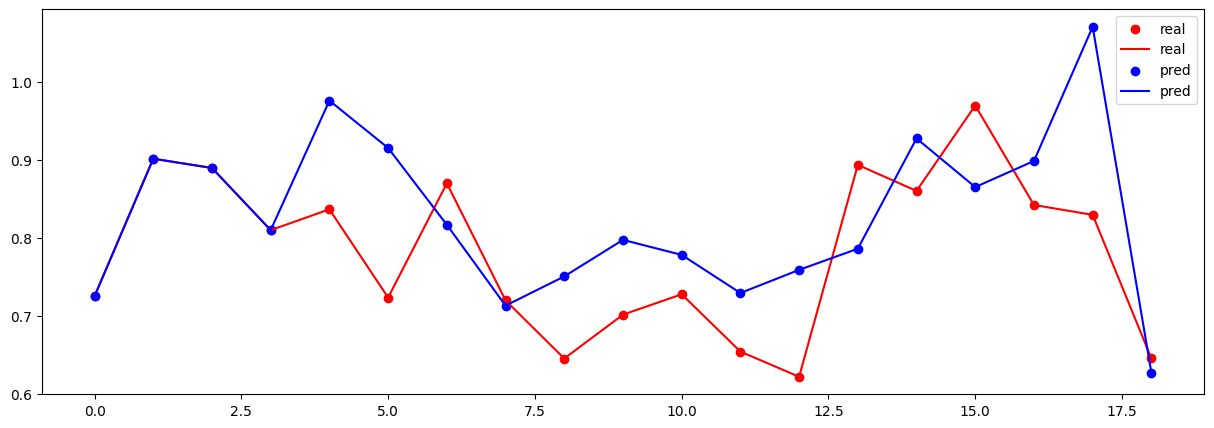

torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 16, 24])
torch.Size([1, 1, 24])
torch.Size([1, 17, 24])
torch.Size([1, 17, 24])


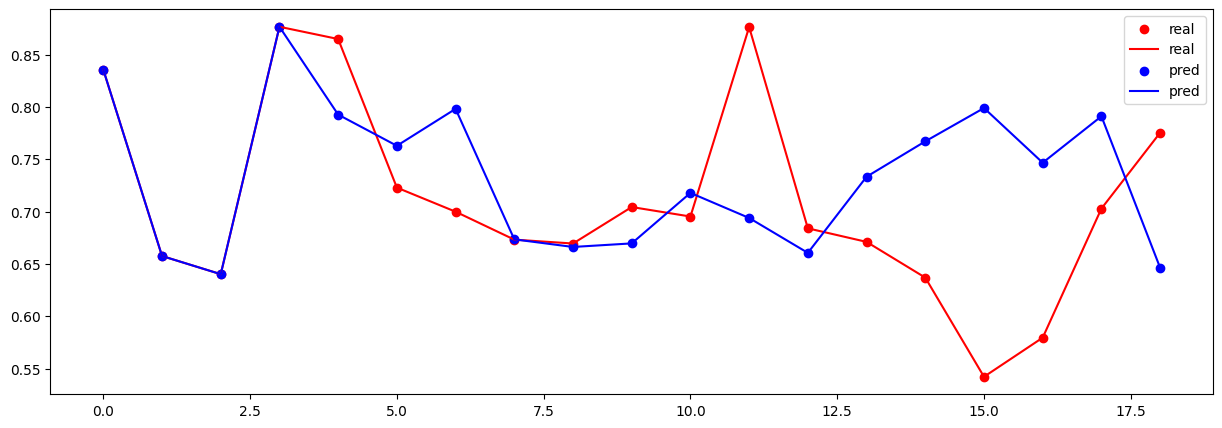

torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 16, 24])
torch.Size([1, 1, 24])
torch.Size([1, 17, 24])
torch.Size([1, 17, 24])


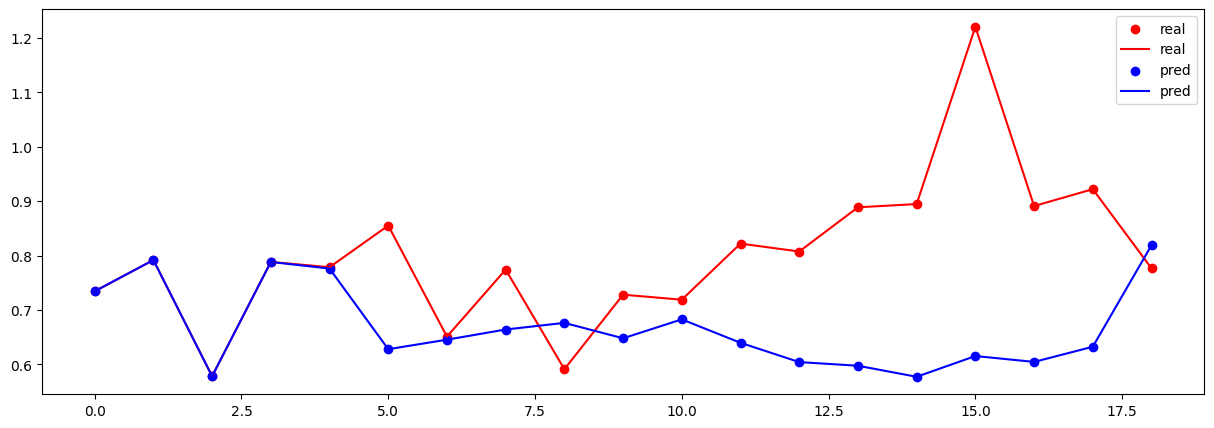

torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 16, 24])
torch.Size([1, 1, 24])
torch.Size([1, 17, 24])
torch.Size([1, 17, 24])


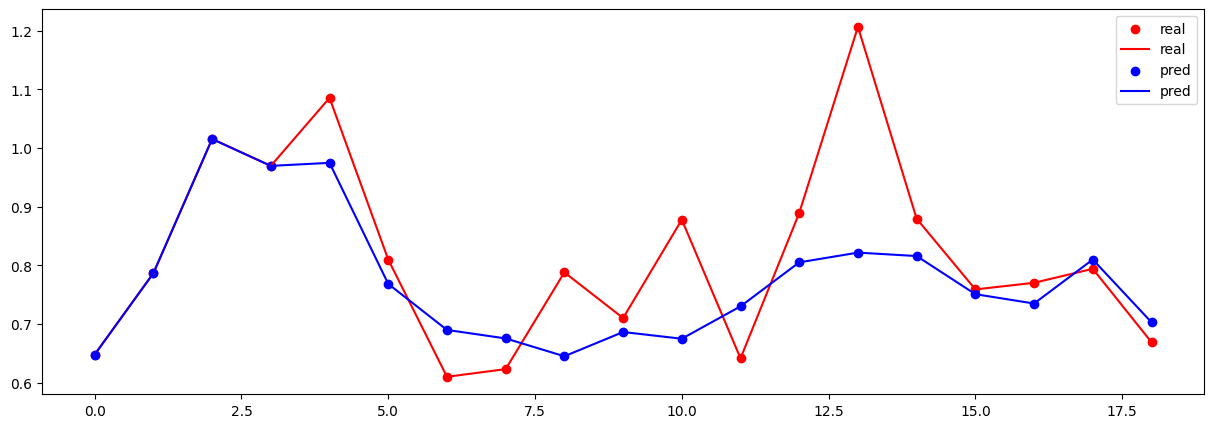

In [54]:

test_CIVS_tr = torch.tensor(test_CIVS.values).float()

test_CIVS_tr_scaled = ( test_CIVS_tr - x_means ) / x_standard_devs

print(  test_CIVS_tr_scaled.shape )


for i in range(0, test_CIVS_tr_scaled.shape[0]- bin_size, bin_size):
    
    batch_x_test = test_CIVS_tr_scaled[ i:i+bin_size ]
    print( batch_x_test.shape )

    GPT_generate_inference(   si_GPT,  batch_x_test, 0 , "SI")



## Simple Linear and Non-Linear NNs


In [55]:

train_CIVS.shape


(1106, 24)

In [56]:

test_CIVS.shape


(277, 24)

In [57]:

train_CIVS


,SI_f1,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,COAL_FLOW_f3,Cast_Avg_Mn_f2,Slag_Fe_f2,Selec_Top_Gas_CO_f3,Selec_Top_Gas_CO2_f3,Selec_Top_Gas_H2_f3,Selec_Top_Gas_N2_f3,NE_Uptake_f3,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,cokerate_f4
0,0.719500,4.242439,2161.425209,9306.840913,184.818611,0.0,0.0,0.354,0.16,21.080431,18.313322,4.131228,54.940123,171.769513,182.533770,148.126483,192.512412,37.369999,36.439999,9.86,98.334297,18.532928,36.602600,884.000000
1,0.710486,4.174343,2168.238915,9336.364456,185.993447,0.0,0.0,0.313,0.83,20.996415,18.311768,4.133911,55.072779,170.595469,183.725050,148.161842,192.366046,35.540001,35.970001,9.03,98.334297,18.397217,36.882963,884.000000
2,0.666106,4.126144,2167.779119,9419.200115,185.828474,0.0,0.0,0.360,0.10,20.749627,18.341701,4.137632,55.375043,167.017421,195.812061,147.562523,198.423474,34.849998,36.590000,9.13,98.334297,18.393974,36.568884,884.000000
3,0.675145,4.120736,2166.974740,9564.165802,185.924481,0.0,0.0,0.319,0.34,20.609259,18.644476,4.142824,55.341884,154.214917,188.028883,147.807509,179.116839,34.009998,35.900002,8.82,98.334297,18.370316,36.839147,884.000000
4,0.776831,4.120331,2166.384674,9648.247637,185.942943,0.0,0.0,0.335,0.28,20.617383,18.845791,4.220690,55.284451,156.234542,200.141261,149.014319,186.052137,34.380001,35.970001,8.73,98.334297,18.395860,36.658018,884.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,1.090154,6.040246,2167.131603,6366.363774,185.706293,0.0,0.0,0.367,1.27,22.185546,17.673989,3.609080,55.349062,170.428165,206.963451,168.748607,193.657605,33.889999,35.509998,8.21,98.334297,18.374931,35.117390,913.033113
1102,0.916000,5.902598,2166.453099,6372.101760,185.617748,0.0,0.0,0.374,0.31,21.984535,17.665509,3.688015,55.444439,172.812301,217.170584,171.314557,202.567587,35.720001,35.709999,9.20,98.334297,18.372890,34.886044,913.000000
1103,0.857000,6.070870,2154.499816,6424.088888,184.699350,0.0,0.0,0.378,0.33,22.127519,17.576216,3.719221,55.364523,165.042808,214.017585,166.957103,184.543943,35.150002,35.110001,8.73,98.334297,18.230667,34.480366,913.000000
1104,0.901000,6.071686,2152.103509,6421.085779,184.833279,0.0,0.0,0.351,0.24,22.124072,17.574704,3.719685,55.385750,163.838193,189.276341,158.000287,170.032540,37.750000,35.119999,9.18,98.334297,18.618744,34.475454,913.000000


In [58]:

test_CIVS


,SI_f1,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,COAL_FLOW_f3,Cast_Avg_Mn_f2,Slag_Fe_f2,Selec_Top_Gas_CO_f3,Selec_Top_Gas_CO2_f3,Selec_Top_Gas_H2_f3,Selec_Top_Gas_N2_f3,NE_Uptake_f3,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,cokerate_f4
1106,0.915006,5.995164,2164.897226,6909.989635,200.737367,0.0,0.0,0.353,0.31,22.134660,17.713546,3.704100,55.220010,167.122098,212.338259,170.128018,186.461848,36.939999,34.400002,9.07,98.334297,20.478349,37.770049,913.0
1107,0.992852,6.094489,2163.584030,6943.583441,200.557172,0.0,0.0,0.341,0.46,22.228343,17.626142,3.719841,55.101137,160.258565,216.598632,167.956525,182.907475,36.820000,35.259998,8.75,98.334297,20.486706,37.836395,913.0
1108,0.963080,6.087850,2165.271545,6913.982041,200.690104,0.0,0.0,0.343,0.44,22.223258,17.714827,3.696118,55.117486,166.637059,223.729090,174.771616,192.074924,36.360001,35.119999,8.74,98.334297,20.463132,37.891260,913.0
1109,0.983788,6.083053,2167.660722,6966.064229,200.659618,0.0,0.0,0.326,0.40,22.042547,17.757612,3.646992,55.205732,171.949405,228.805253,172.977718,200.925128,37.090000,35.680000,8.85,98.334297,20.464851,37.520468,913.0
1110,1.220831,5.999433,2166.854319,6903.162966,200.353817,0.0,0.0,0.334,0.32,21.768646,18.066988,3.595101,55.267963,157.100609,191.539174,159.041267,173.525355,37.900002,34.689999,9.24,98.334297,20.394829,37.613267,913.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,0.762500,4.204430,2169.361647,9297.484543,185.046491,0.0,0.0,0.343,0.30,21.039583,18.308225,4.129485,55.162782,167.619915,185.900341,148.103530,199.914193,35.900002,37.259998,10.04,98.334297,18.209401,36.727897,884.0
1379,0.646000,4.208539,2169.079601,9312.779010,185.053796,0.0,0.0,0.324,0.30,21.043999,18.308776,4.129674,55.162767,164.706552,182.408576,148.106012,193.501805,35.900002,37.259998,10.04,98.334297,18.762846,36.949964,884.0
1380,0.654667,4.212648,2168.797556,9303.753420,185.007919,0.0,0.0,0.325,0.16,21.048415,18.309327,4.129862,55.140373,166.903493,181.684649,148.108493,194.328694,35.580002,36.500000,9.30,98.334297,18.510120,36.877184,884.0
1381,0.591667,4.217784,2168.444999,9333.448101,184.942435,0.0,0.0,0.335,0.26,21.053935,18.310016,4.130097,55.098014,175.524144,195.202191,148.111595,215.606202,35.130001,37.470001,10.01,98.334297,18.168884,36.681149,884.0



## Process the train data


In [59]:

def Conver_train_simple_data( data ):
    
    data_tr = torch.tensor( data.values ).float()

    print(  data_tr.shape  )


    x  = torch.stack(   [   data_tr[ 0 : -1      ]    ]    ) 
    y  = torch.stack(   [   data_tr[ 1 :   ,  0  ]    ]   )    ## 0 is to select silicon only

    x = x.squeeze(0)
    y = y.squeeze(0)

    print( x.shape )
    print( y.shape )
    
    ###################################################
    ## add previous silicons
    
    to_concat = torch.zeros( (x.shape[ 0 ], 3) )
    print( to_concat.shape )

    start_at = 3

    for i in range( start_at, x.shape[ 0 ] ):

        to_concat[ i, 0 ] = x[  i-3, 0]
        to_concat[ i, 1 ] = x[  i-2, 0]
        to_concat[ i, 2 ] = x[  i-1, 0]

    
    print( to_concat )
    print( to_concat.shape )
    print( x.shape )
    print( y.shape )

    new_x = torch.cat((x, to_concat), 1)

    print( "after concat " )
    print( to_concat.shape )
    print( x.shape )
    print( y.shape )
    print( new_x.shape )

    x = new_x[ 3: ]
    y =     y[ 3: ]
    
    
    x, y = x.to(device), y.to(device)

    return x, y



In [60]:

simple_x_train, simple_y_train = Conver_train_simple_data( train_CIVS )


torch.Size([1106, 24])
torch.Size([1105, 24])
torch.Size([1105])
torch.Size([1105, 3])
tensor([[0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        ...,
        [0.8535, 0.9172, 1.0902],
        [0.9172, 1.0902, 0.9160],
        [1.0902, 0.9160, 0.8570]])
torch.Size([1105, 3])
torch.Size([1105, 24])
torch.Size([1105])
after concat 
torch.Size([1105, 3])
torch.Size([1105, 24])
torch.Size([1105])
torch.Size([1105, 27])


In [61]:

print( simple_x_train.shape ) 
print( simple_y_train.shape )


torch.Size([1102, 27])
torch.Size([1102])



## Convert Simple Test data


In [62]:

def Conver_test_simple_data( data ):
    
    data_tr = torch.tensor( data.values ).float()

    print(  data_tr.shape  )

    x  = torch.stack(   [   data_tr[ 0 : -1      ]    ]    ) 
    y  = torch.stack(   [   data_tr[ 1 :   ,  0  ]    ]   )    ## 0 is to select silicon only

    x = x.squeeze(0)
    y = y.squeeze(0)

    print( x.shape )
    print( y.shape )
    
    ###################################################
    ## add previous silicons
    
    to_concat = torch.zeros( (x.shape[ 0 ], 3) )
    print( to_concat.shape )

    start_at = 3

    for i in range( start_at, x.shape[ 0 ] ):

        to_concat[ i, 0 ] = x[  i-3, 0]
        to_concat[ i, 1 ] = x[  i-2, 0]
        to_concat[ i, 2 ] = x[  i-1, 0]

    
    print( to_concat )
    print( to_concat.shape )
    print( x.shape )
    print( y.shape )

    

    new_x = torch.cat((x, to_concat), 1)

    print( "after concat " )
    print( to_concat.shape )
    print( x.shape )
    print( y.shape )
    print( new_x.shape )

    x = new_x[ 3: ]
    y =     y[ 3: ]
    
    
    x, y = x.to(device), y.to(device)

    return x, y



In [63]:

simple_x_test, simple_y_test = Conver_test_simple_data( test_CIVS )


torch.Size([277, 24])
torch.Size([276, 24])
torch.Size([276])
torch.Size([276, 3])
tensor([[0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.9150, 0.9929, 0.9631],
        [0.9929, 0.9631, 0.9838],
        [0.9631, 0.9838, 1.2208],
        [0.9838, 1.2208, 1.0602],
        [1.2208, 1.0602, 0.9145],
        [1.0602, 0.9145, 1.0963],
        [0.9145, 1.0963, 1.1471],
        [1.0963, 1.1471, 1.0192],
        [1.1471, 1.0192, 0.9014],
        [1.0192, 0.9014, 1.0486],
        [0.9014, 1.0486, 1.0216],
        [1.0486, 1.0216, 1.1801],
        [1.0216, 1.1801, 0.9466],
        [1.1801, 0.9466, 1.0487],
        [0.9466, 1.0487, 0.8987],
        [1.0487, 0.8987, 1.1170],
        [0.8987, 1.1170, 1.0590],
        [1.1170, 1.0590, 1.1540],
        [1.0590, 1.1540, 1.4600],
        [1.1540, 1.4600, 0.9643],
        [1.4600, 0.9643, 0.8014],
        [0.9643, 0.8014, 0.6542],
        [0.8014, 0.6542, 0.7371],
        [0.6542, 0.7371, 0.7278],

In [64]:

print( simple_x_test.shape ) 
print( simple_y_test.shape )


torch.Size([273, 27])
torch.Size([273])



## Parameters


In [65]:

batch_size    = 16
learning_rate = 0.001 ## 0.001
N_Epochs      = 4000

epsilon = 0.0001



## Standardize


In [66]:

simple_y_train = simple_y_train.unsqueeze(1)


In [67]:

print( simple_x_train.shape ) 
print( simple_y_train.shape )


torch.Size([1102, 27])
torch.Size([1102, 1])


In [68]:


x_means      = simple_x_train.mean(0, keepdim=True ) 

x_deviations = simple_x_train.std( 0, keepdim=True) + epsilon


In [69]:

x_means


tensor([[8.9684e-01, 6.4988e+00, 2.1408e+03, 8.0815e+03, 1.8728e+02, 1.1924e+00,
         1.6583e-04, 4.0684e-01, 2.4219e-01, 2.1394e+01, 1.8420e+01, 4.2831e+00,
         5.4670e+01, 1.7483e+02, 2.0635e+02, 1.6710e+02, 2.1099e+02, 3.8357e+01,
         3.7271e+01, 9.7168e+00, 9.8270e+01, 1.8715e+01, 3.6757e+01, 9.2632e+02,
         8.9631e-01, 8.9649e-01, 8.9663e-01]])

In [70]:

x_means.shape


torch.Size([1, 27])


## Create the DataLoader


In [71]:

train_ds = TensorDataset( simple_x_train, simple_y_train  )


In [72]:

train_dl = DataLoader( train_ds, batch_size, shuffle=True  )


In [73]:

train_dl



## Neural Network Architectures


In [74]:

## Linear Regression

class LinRegNet(nn.Module):
    ## init the class
    def __init__(self, x_means, x_deviations):
        super().__init__()
        
        self.x_means      = x_means
        self.x_deviations = x_deviations
        
        self.linear1 = nn.Linear(27, 1)
        
    ## perform inference
    def forward(self, x):
        
        x = (x - self.x_means) / self.x_deviations
        
        y_pred = self.linear1(x)
        ## return torch.round( y_pred )
        return y_pred


In [75]:

## MLP

class MLP_Net(nn.Module):
    ## init the class
    def __init__(self, x_means, x_deviations):
        super().__init__()
        
        self.x_means      = x_means
        self.x_deviations = x_deviations
        
        self.linear1 = nn.Linear(27, 12)
        self.act1    = nn.Sigmoid()
        self.linear2 = nn.Linear(12, 1)
        self.dropout = nn.Dropout(0.25)
        
    ## perform inference
    def forward(self, x):
        
        x = (x - self.x_means) / self.x_deviations
        
        x = self.linear1(x)
        x = self.act1(x)
        x = self.dropout(x)
        y_pred = self.linear2(x)
        
        ## return torch.round( y_pred )
        return y_pred


In [76]:

## Deep Learning with 2 hidden layers

class DL_Net(nn.Module):
    ## init the class
    def __init__(self, x_means, x_deviations):
        super().__init__()
        
        self.x_means      = x_means
        self.x_deviations = x_deviations
        
        self.linear1 = nn.Linear(27, 16)
        self.act1    = nn.Sigmoid()
        self.linear2 = nn.Linear(16, 8)
        self.act2    = nn.Sigmoid()             ## nn.ReLU()
        self.linear3 = nn.Linear(8, 1)
        self.dropout = nn.Dropout(0.10)
        
    ## perform inference
    def forward(self, x):
        
        x = (x - self.x_means) / self.x_deviations
        
        x = self.linear1(x)
        x = self.act1(x)
        x = self.linear2(x)
        x = self.act2(x)
        ## x = self.dropout(x)
        y_pred = self.linear3(x)
        
        ## return torch.round( y_pred )
        return y_pred


In [77]:

## Linear plus Nonlinear
## f1 + f2

class LinearPlusNonLinear_Net(nn.Module):
    ## init the class
    def __init__(self, x_means, x_deviations):
        super().__init__()
        
        self.x_means      = x_means
        self.x_deviations = x_deviations
        
        ## F1
        self.f1_linear1 = nn.Linear(27, 1)
        
        ## F2
        self.f2_linear1 = nn.Linear(27, 15)
        self.f2_act1    = nn.Sigmoid()
        self.f2_linear2 = nn.Linear(15, 1)
        
    
    ## perform inference
    def forward(self, x):
        
        x = (x - self.x_means) / self.x_deviations
        
        ## F1
        f1 = self.f1_linear1(x)
        
        ## F2
        f2 = self.f2_linear1(x)
        f2 = self.f2_act1(f2)
        f2 = self.f2_linear2(f2)
        
        y_pred = f1 + f2
        
        ## return torch.round( y_pred )
        return y_pred



## Training Loop


In [78]:

def training_loop( N_Epochs, model, loss_fn, opt  ):
    
    for epoch in range(N_Epochs):
        for xb, yb in train_dl:
            
            y_pred = model(xb)
            loss   = loss_fn(y_pred, yb)
            
            opt.zero_grad()
            loss.backward()
            opt.step()
            
        if epoch % 20 == 0:
            print(epoch, "loss=", loss)


In [79]:

## model = LinRegNet( x_means, x_deviations  )

## model = MLP_Net( x_means, x_deviations  )

model = LinearPlusNonLinear_Net( x_means, x_deviations  )

## model = DL_Net( x_means, x_deviations  )

opt     = torch.optim.Adam(    model.parameters(), lr=learning_rate )
loss_fn = F.mse_loss

training_loop(  N_Epochs, model, loss_fn, opt  )


0 loss= tensor(0.4415, grad_fn=<MseLossBackward0>)
20 loss= tensor(0.0149, grad_fn=<MseLossBackward0>)
40 loss= tensor(0.0070, grad_fn=<MseLossBackward0>)
60 loss= tensor(0.0086, grad_fn=<MseLossBackward0>)
80 loss= tensor(0.0094, grad_fn=<MseLossBackward0>)
100 loss= tensor(0.0169, grad_fn=<MseLossBackward0>)
120 loss= tensor(0.0250, grad_fn=<MseLossBackward0>)
140 loss= tensor(0.0085, grad_fn=<MseLossBackward0>)
160 loss= tensor(0.0108, grad_fn=<MseLossBackward0>)
180 loss= tensor(0.0144, grad_fn=<MseLossBackward0>)
200 loss= tensor(0.0163, grad_fn=<MseLossBackward0>)
220 loss= tensor(0.0203, grad_fn=<MseLossBackward0>)
240 loss= tensor(0.0196, grad_fn=<MseLossBackward0>)
260 loss= tensor(0.0467, grad_fn=<MseLossBackward0>)
280 loss= tensor(0.0156, grad_fn=<MseLossBackward0>)
300 loss= tensor(0.0055, grad_fn=<MseLossBackward0>)
320 loss= tensor(0.0128, grad_fn=<MseLossBackward0>)
340 loss= tensor(0.0144, grad_fn=<MseLossBackward0>)
360 loss= tensor(0.0121, grad_fn=<MseLossBackward0>)


## Evaluate Model


In [80]:

print( simple_x_test.shape ) 
print( simple_y_test.shape )


torch.Size([273, 27])
torch.Size([273])


In [81]:
 
simple_y_test = simple_y_test.unsqueeze(1)

print( simple_y_test.shape )


torch.Size([273, 1])


In [82]:

y_pred_test = model( simple_x_test )


In [83]:

y_pred_test.shape


torch.Size([273, 1])

In [84]:

print( "Testing R**2: ", r2_score(  simple_y_test.numpy(),  y_pred_test.detach().numpy()     )  ) 


Testing R**2:  0.19947476817655962


In [85]:

list_preds = []
list_reals = []

for i in range(len(simple_x_test)):
    print("************************************")
    print("pred, real")
    np_real =   simple_y_test[i].detach().numpy()
    np_pred = y_pred_test[i].detach().numpy()
    print(( np_pred  , np_real))
    list_preds.append(np_pred[0])
    list_reals.append(np_real[0])


************************************
pred, real
(array([0.96367145], dtype=float32), array([1.2208307], dtype=float32))
************************************
pred, real
(array([1.1924927], dtype=float32), array([1.0601667], dtype=float32))
************************************
pred, real
(array([0.6657033], dtype=float32), array([0.91451067], dtype=float32))
************************************
pred, real
(array([0.76117283], dtype=float32), array([1.0963067], dtype=float32))
************************************
pred, real
(array([1.3531866], dtype=float32), array([1.1471282], dtype=float32))
************************************
pred, real
(array([1.6015089], dtype=float32), array([1.0192058], dtype=float32))
************************************
pred, real
(array([1.210885], dtype=float32), array([0.90144265], dtype=float32))
************************************
pred, real
(array([0.86201334], dtype=float32), array([1.0485954], dtype=float32))
************************************
pred, r


## Plot all test samples (only predicts one into the future)


In [86]:

def plot_preds_vs_reals( list_preds, list_reals ):
        

        plt.figure(figsize=(13,4))
        plt.plot(list_reals, label= 'real', color='r' )
        plt.plot(list_preds, label= 'pred')

        plt.title( str( ' SI real vs prediction ' ) )
        plt.xlabel('test set samples')
        plt.ylabel('output')
        plt.legend()

        ## output_file_name = 'images/Y' + str(z) + self.furnace_model_name + 'RealToPredicted'
        ## output_file_name = output_file_name + self.the_string + '.png'
        ## plt.savefig(output_file_name, dpi=300)
        plt.show()

                      
        ''' 
        n_bins = 20
        y_pred = np.array(list_preds_y)
        y_real = np.array(list_reals_y)
        error = y_pred - y_real
        fig, ax = plt.subplots(figsize =(10, 7))
        plt.hist(error, bins=n_bins, density = True, color='r', alpha=0.5)
        sns.distplot(error, bins=n_bins, color="blue")
        plt.title( str(self.dict_ids_to_names[self.output_indeces[z]]) + ' ' )
        plt.show()
        '''
        


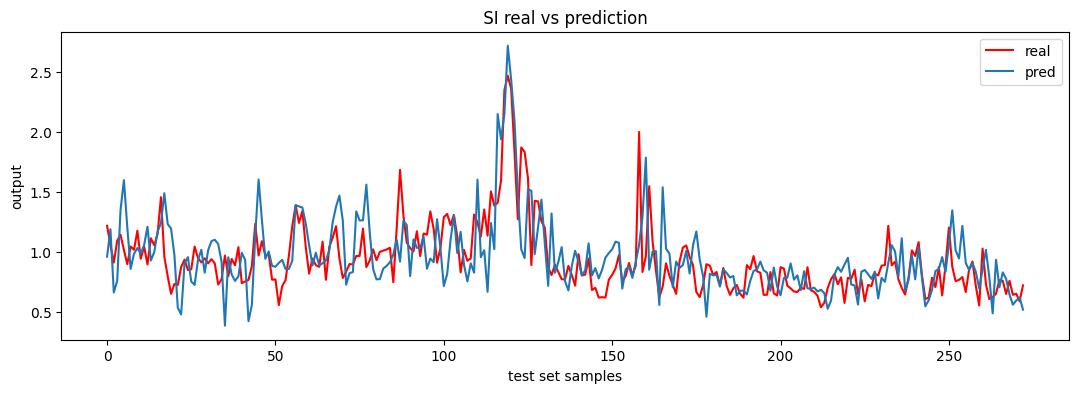

In [87]:

plot_preds_vs_reals( list_preds, list_reals )



## Now predict given 5 into future of 20 (the bins)


In [88]:

def simple_generate_inference( model, xb_test, yb_test, which_feature, string_feature):

    
    print(xb_test.shape)
    print(yb_test.shape)

    input_test_x = xb_test[ 0 ]
    
    print(input_test_x.shape)

    list_pred_si = []

    for i in range( xb_test.shape[0] ):
    
        pred_1_si = model( input_test_x )

        list_pred_si.append( pred_1_si.item() )
        
        print(pred_1_si.shape)
        
        input_test_x[24] = input_test_x[25]
        input_test_x[25] = input_test_x[26]
        input_test_x[26] = pred_1_si



    y_pred_simple  =     list_pred_si  

    yb_test = yb_test.squeeze(1)
    y_real_simple  =     yb_test.numpy().tolist() 
    
    ## print(y_pred_simple)
    ## print(y_real_simple)

    l_pred = y_pred_simple
    l_real = y_real_simple



    eval_criterion = nn.MSELoss()

    mse_eval_bins = eval_criterion(
                          torch.FloatTensor( l_pred ), 
                          torch.FloatTensor( l_real )
    )

    ## print( l_pred  )
    ## print( l_real )



    print(f'Test MSE Loss: {mse_eval_bins.item():.4f}')

    x = [ i for i in range(len(l_real)) ] 
    print(len(x))


    plt.scatter(x, l_real, label = "real", color='red') 
    plt.plot(   x, l_real, label = "real", color='red') 
 
    ##print( l_pred[1:].shape )
    ##print( l_pred[0].shape )
    ## l_pred  = np.concatenate( ( l_pred[1:], l_pred[0] ) )
    ## l_pred = np.roll(l_pred, -1)
    
    plt.scatter(x, l_pred, label = "pred", color='blue') 
    plt.plot(   x, l_pred, label = "pred", color='blue') 
    
    plt.legend() 
    plt.show()
  



In [89]:

bin_size = 20


In [90]:

print( simple_x_test.shape ) 
print( simple_y_test.shape )


torch.Size([273, 27])
torch.Size([273, 1])


torch.Size([20, 27])
torch.Size([20, 1])
torch.Size([20, 27])
torch.Size([20, 1])
torch.Size([27])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
Test MSE Loss: 0.1017
20


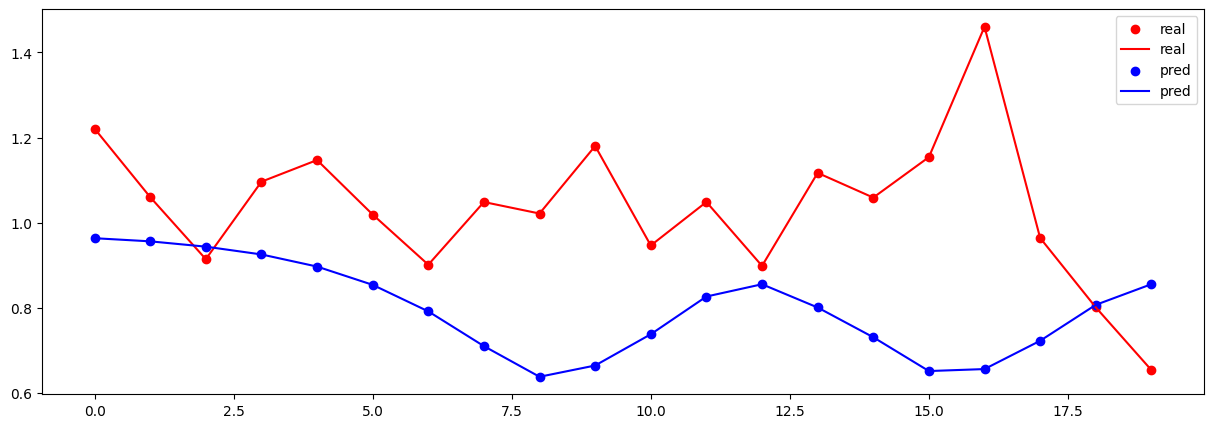

torch.Size([20, 27])
torch.Size([20, 1])
torch.Size([20, 27])
torch.Size([20, 1])
torch.Size([27])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
Test MSE Loss: 0.1156
20


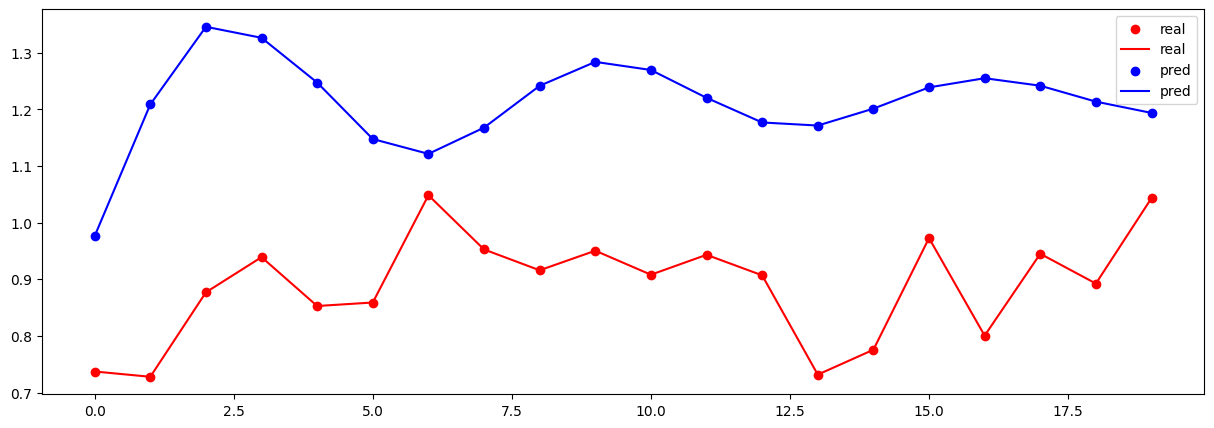

torch.Size([20, 27])
torch.Size([20, 1])
torch.Size([20, 27])
torch.Size([20, 1])
torch.Size([27])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
Test MSE Loss: 0.3145
20


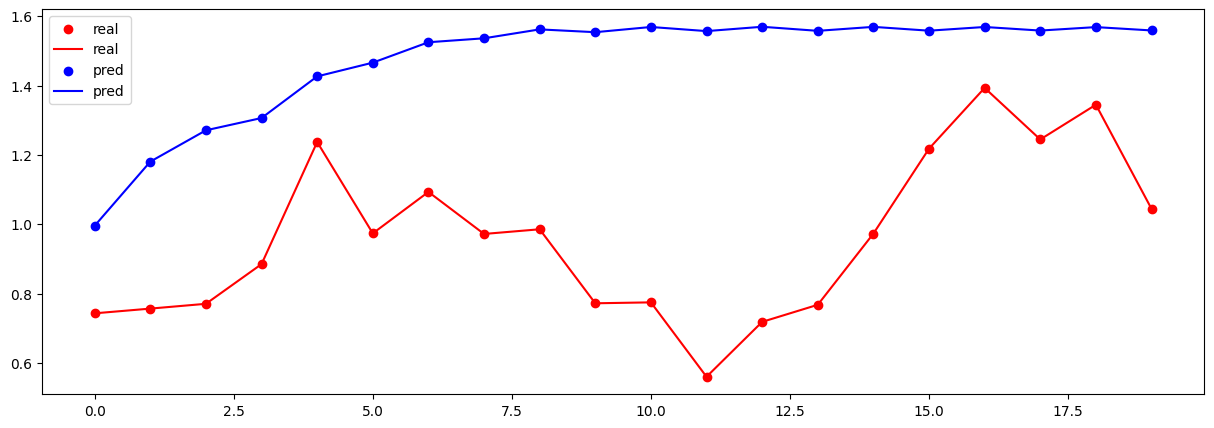

torch.Size([20, 27])
torch.Size([20, 1])
torch.Size([20, 27])
torch.Size([20, 1])
torch.Size([27])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
Test MSE Loss: 0.0170
20


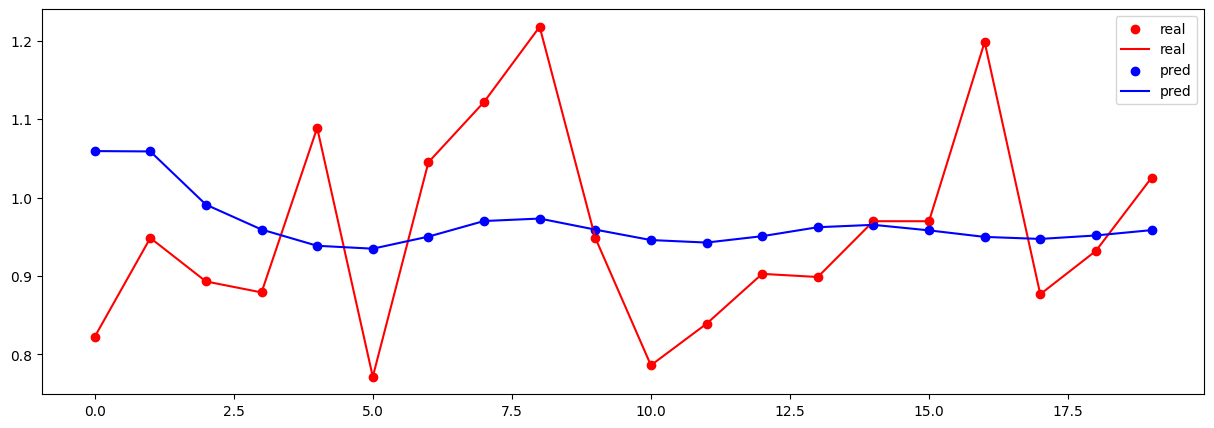

torch.Size([20, 27])
torch.Size([20, 1])
torch.Size([20, 27])
torch.Size([20, 1])
torch.Size([27])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
Test MSE Loss: 0.0572
20


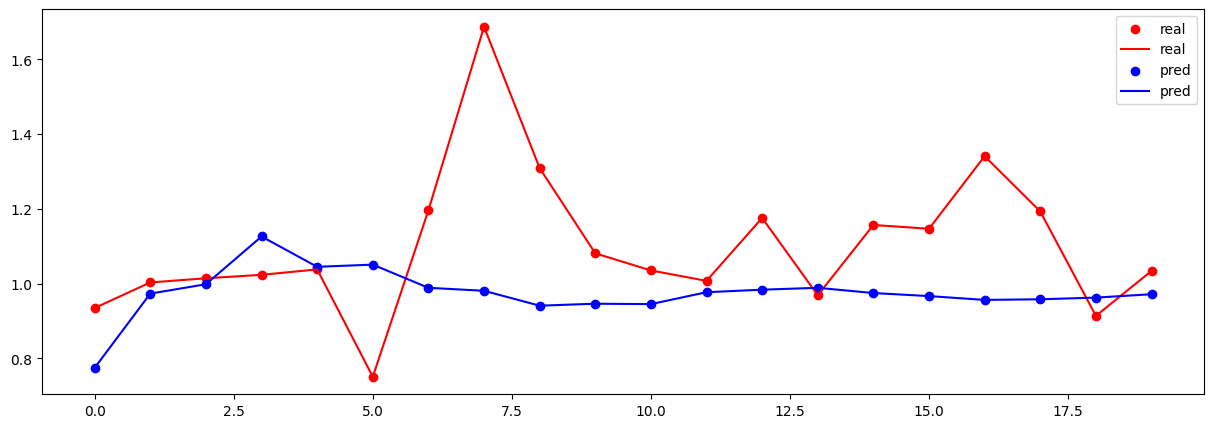

torch.Size([20, 27])
torch.Size([20, 1])
torch.Size([20, 27])
torch.Size([20, 1])
torch.Size([27])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
Test MSE Loss: 0.5330
20


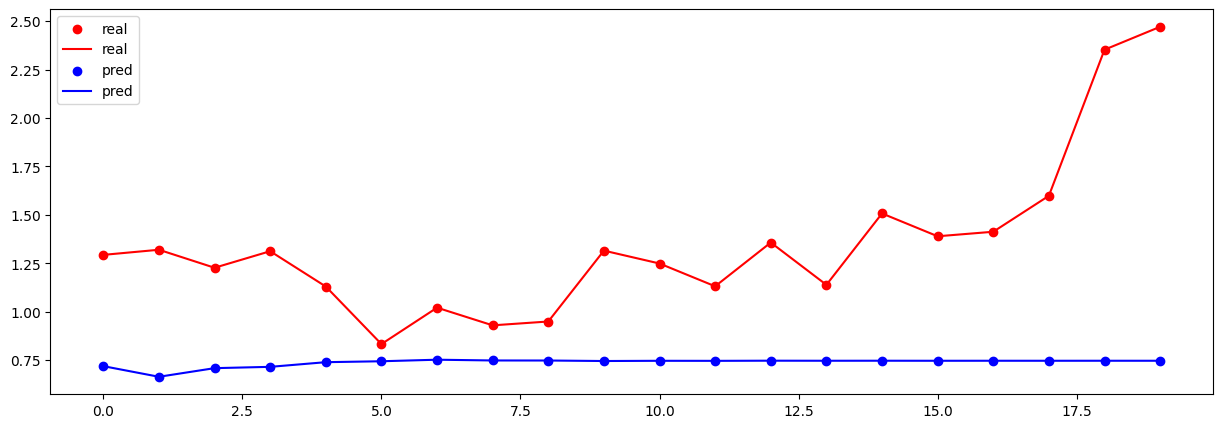

torch.Size([20, 27])
torch.Size([20, 1])
torch.Size([20, 27])
torch.Size([20, 1])
torch.Size([27])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
Test MSE Loss: 1.2158
20


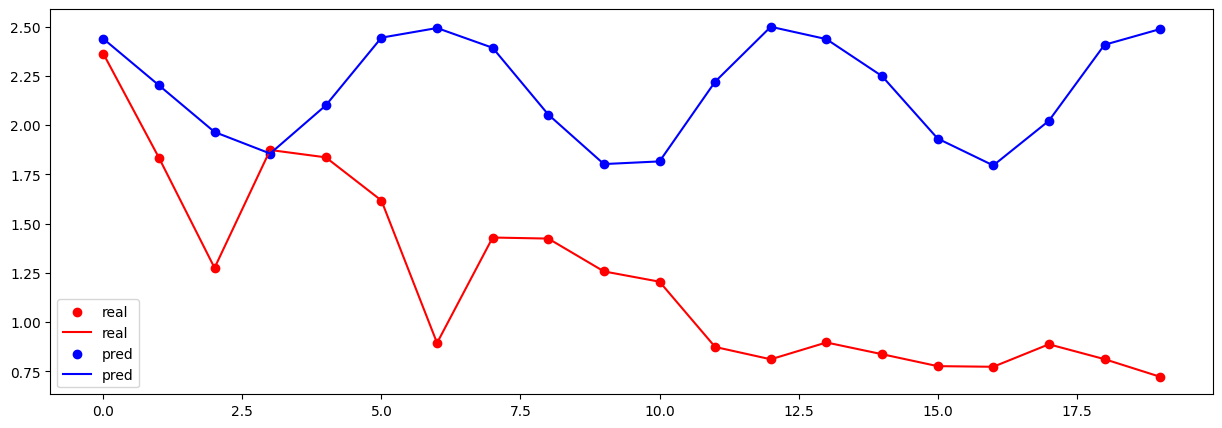

torch.Size([20, 27])
torch.Size([20, 1])
torch.Size([20, 27])
torch.Size([20, 1])
torch.Size([27])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
Test MSE Loss: 0.0817
20


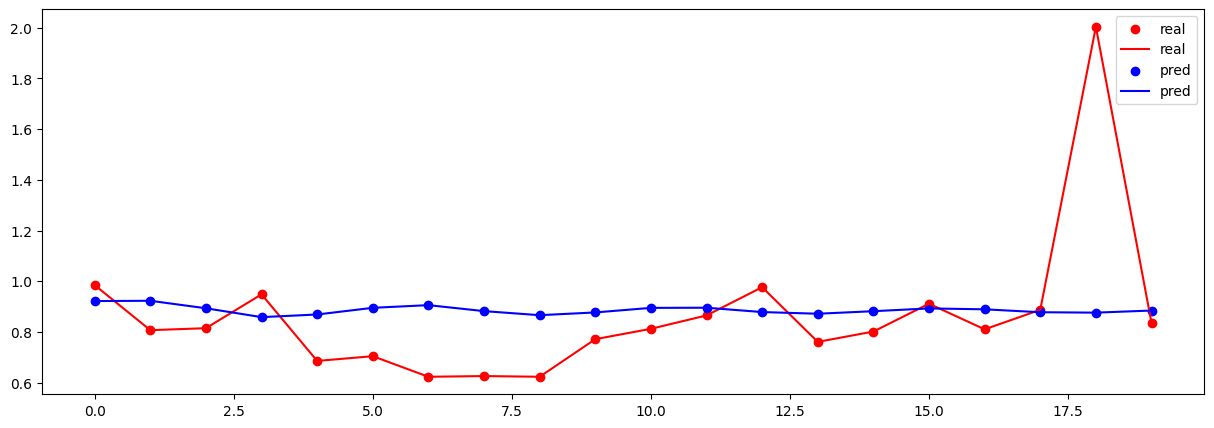

torch.Size([20, 27])
torch.Size([20, 1])
torch.Size([20, 27])
torch.Size([20, 1])
torch.Size([27])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
Test MSE Loss: 0.1772
20


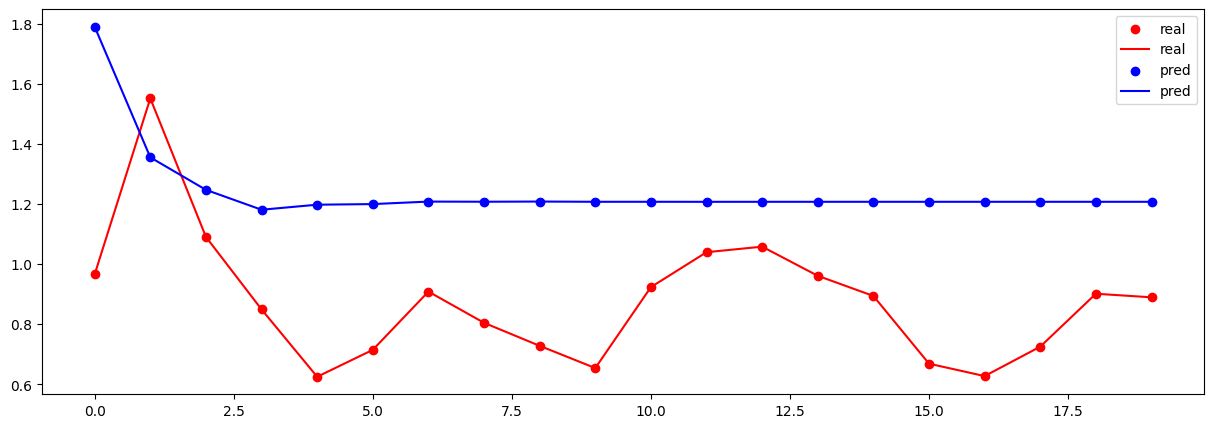

torch.Size([20, 27])
torch.Size([20, 1])
torch.Size([20, 27])
torch.Size([20, 1])
torch.Size([27])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
Test MSE Loss: 0.0785
20


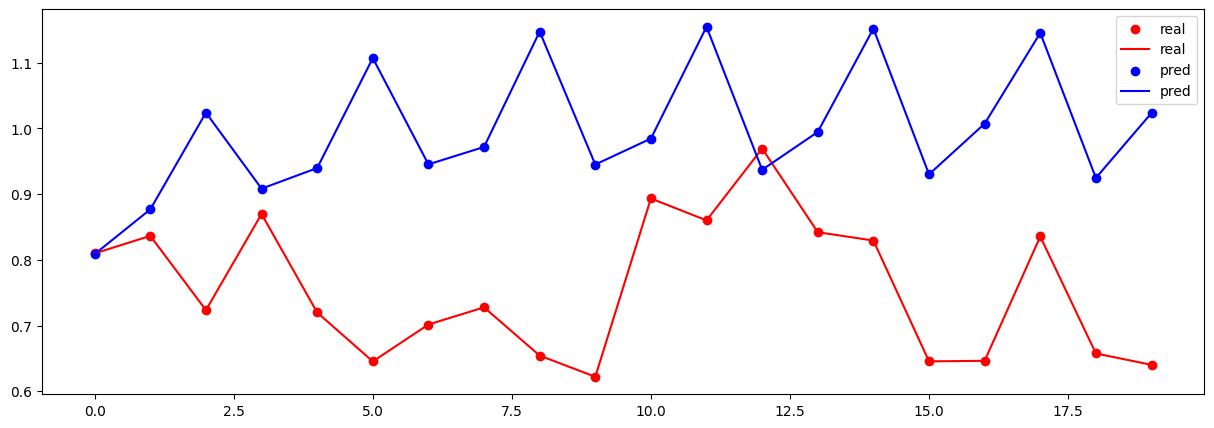

torch.Size([20, 27])
torch.Size([20, 1])
torch.Size([20, 27])
torch.Size([20, 1])
torch.Size([27])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
Test MSE Loss: 0.0100
20


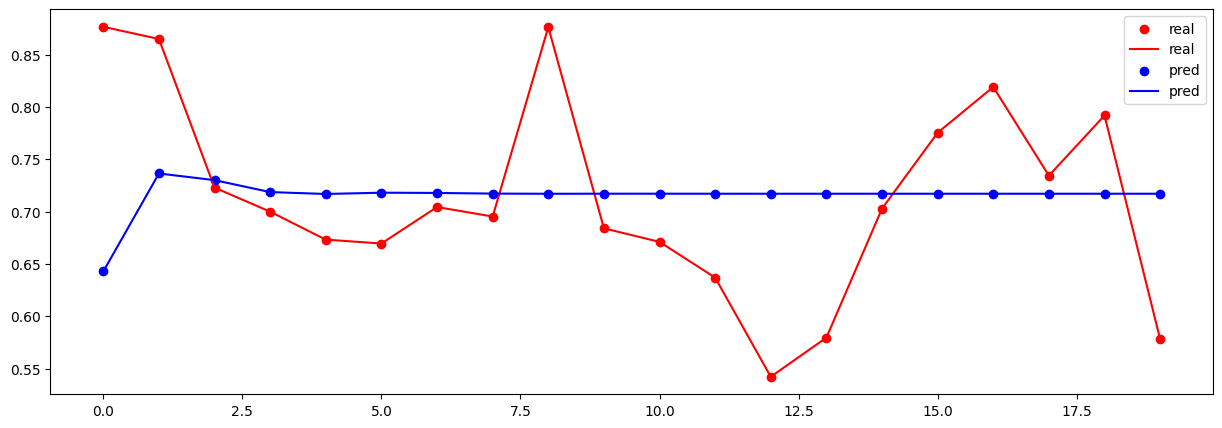

torch.Size([20, 27])
torch.Size([20, 1])
torch.Size([20, 27])
torch.Size([20, 1])
torch.Size([27])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
Test MSE Loss: 0.1102
20


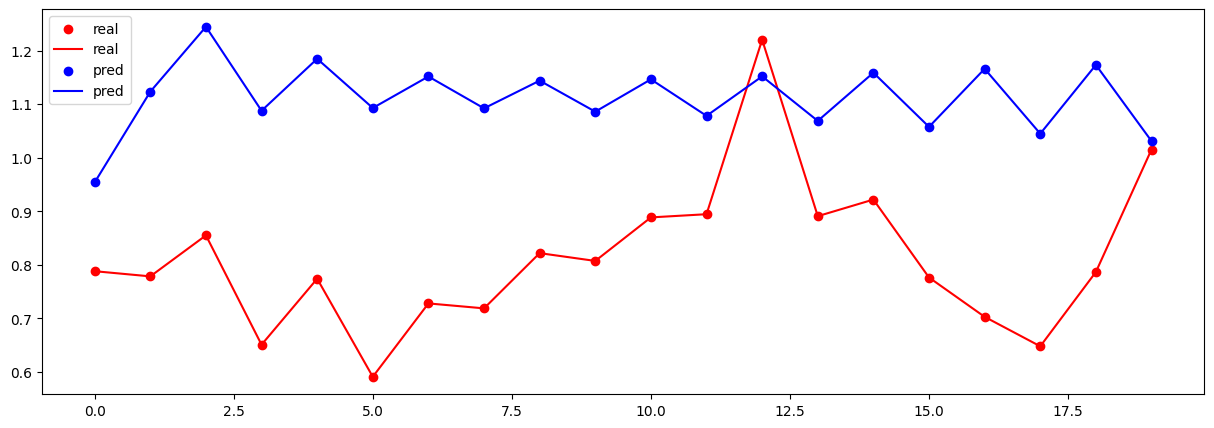

torch.Size([20, 27])
torch.Size([20, 1])
torch.Size([20, 27])
torch.Size([20, 1])
torch.Size([27])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
Test MSE Loss: 0.2404
20


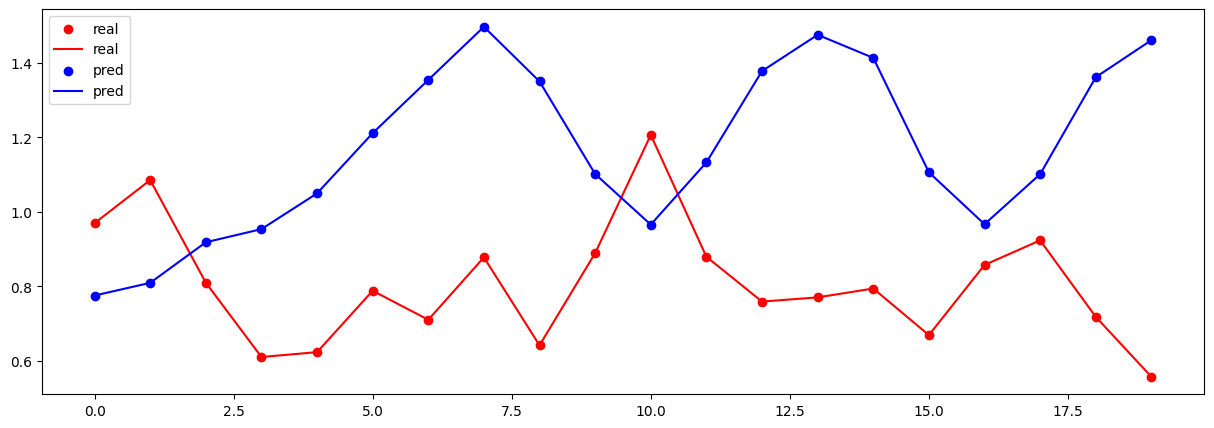

In [91]:

for i in range(0, simple_x_test.shape[0]- bin_size, bin_size):
    
    batch_x_test = simple_x_test[ i:i+bin_size ]
    print( batch_x_test.shape )

    batch_y_test = simple_y_test[ i:i+bin_size ]
    print( batch_y_test.shape )

    simple_generate_inference(   model,  batch_x_test, batch_y_test, 0 , "SI")
